## Import all the necessary libraries and packages


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import scipy
import random

In [39]:
data_train = pd.read_csv('data_perfectly_clean_train.csv')
data_test = pd.read_csv('data_perfectly_clean_test.csv')
data_train.dropna(inplace=True)


In [40]:
data_all = pd.concat([data_train, data_test], axis=0)
print(data_all.shape)

(72974, 90)


In [4]:
data_test

,Label,Sbj_ID,Age,Gender,Race1,Race2,Race3,Race4,ifCleanOnset,Time2Sleep,...,wrseltr5,slpapnea5,cpap5,dntaldv5,uvula5,insmnia5,rstlesslgs5,whiirs5c,epslpscl5c,hoostmeq5c
0,29.9,323,79,1,1.0,0.0,0.0,0.0,1,68.5,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,11.0,15.0
1,29.8,323,79,1,1.0,0.0,0.0,0.0,1,68.5,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,11.0,15.0
2,29.7,323,79,1,1.0,0.0,0.0,0.0,1,68.5,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,11.0,15.0
3,29.6,323,79,1,1.0,0.0,0.0,0.0,1,68.5,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,11.0,15.0
4,29.5,323,79,1,1.0,0.0,0.0,0.0,1,68.5,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,11.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16195,0.4,6629,78,0,0.0,0.0,0.0,1.0,1,43.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,13.0,11.0
16196,0.3,6629,78,0,0.0,0.0,0.0,1.0,1,43.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,13.0,11.0
16197,0.2,6629,78,0,0.0,0.0,0.0,1.0,1,43.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,13.0,11.0
16198,0.1,6629,78,0,0.0,0.0,0.0,1.0,1,43.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,13.0,11.0


In [5]:
# plot how many nans there are for each participant in data_test

test_unique_ids = data_test['Sbj_ID'].unique()
test_unique_ids = test_unique_ids.tolist()
len(test_unique_ids)

# calculate how many nans there are for each participant in data_test
nans_per_participant = {}
for i in test_unique_ids:
    nans_per_participant[i] = data_test[data_test['Sbj_ID'] == i]['delta'].isnull().sum()

# get the ids of the pariticpants with the least nans
nans_per_participant = {k: v for k, v in sorted(nans_per_participant.items(), key=lambda item: item[1])}
print(nans_per_participant)

# get the top 20 participants with the least nans
top_20 = list(nans_per_participant.keys())[:20]

# get data_test with only the top 20 participants with the least nans
selected_participants_data = data_test[data_test['Sbj_ID'].isin(top_20)]

# save the data_test with only the top 20 participants with the least nans
selected_participants_data.to_csv('data_test_perfectly_clean_top_20.csv', index=False)


{5749: 1, 5881: 2, 4190: 9, 323: 10, 5876: 10, 694: 11, 2040: 12, 2780: 12, 10: 12, 2651: 13, 4437: 13, 4014: 14, 5782: 14, 6454: 14, 1476: 15, 5838: 19, 5489: 20, 3920: 21, 2574: 21, 912: 22, 3106: 22, 1405: 24, 6316: 24, 6072: 26, 4555: 27, 3211: 28, 6261: 29, 823: 30, 2681: 31, 4157: 33, 4806: 35, 384: 35, 1501: 40, 5784: 42, 2750: 42, 6629: 43, 2375: 46, 5939: 49, 614: 54, 3855: 54, 5476: 54, 5240: 56, 3980: 63, 460: 65, 1033: 69, 893: 70, 2413: 70, 2377: 74, 658: 75, 3641: 79, 3793: 86, 5438: 92, 5722: 99, 3894: 105}


In [6]:
selected_participants_data = pd.read_csv('data_test_perfectly_clean_top_20.csv')
selected_participants_data.dropna(inplace=True)
selected_participants = selected_participants_data['Sbj_ID'].unique().tolist()
selected_participants

[323,
 694,
 912,
 1476,
 2040,
 2651,
 2780,
 3920,
 4014,
 4190,
 4437,
 5749,
 5782,
 5838,
 5876,
 6454,
 10,
 2574,
 5489,
 5881]

## Define the helper functions

In [7]:

def get_timeline(mydata_no_nan):
 
    # assert that the data has no NaNs
    assert mydata_no_nan.isnull().sum().sum() == 0, 'There are NaNs in the data'
    

    # Create X and y from dataframes to use in scikit-learn (drop Label, SleepStage, Sbj_ID and ifCleanOnset columns)
    X_all = mydata_no_nan.drop(['Label', 'Old_label', 'SleepStage', 'Sbj_ID', 'ifCleanOnset', 'Time2Sleep'], axis=1)
    y_all = mydata_no_nan['Label']
    y_old_all = mydata_no_nan['Old_label']
    y_sleepstage_all = mydata_no_nan['SleepStage']

    

    return X_all, y_all, y_old_all, y_sleepstage_all

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import os
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, 
                             roc_curve, roc_auc_score, auc)
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score

def evaluate_classification(true_labels, predictions, prediction_probabilities,
                            index=['10 minutes before sleep', 'Awake'], 
                            label =['10 minutes before sleep', 'Awake'], 
                            save_path='confusion_matrix.png', ifsaveplots = False, 
                            output_path=None, iftest = False, ifplot = True, classes = None, ifvocal = True):
    
    # Evaluate the performance of the model
    accuracy = accuracy_score(true_labels, predictions)
    if iftest:
        if ifvocal:
            print(f'Accuracy: {accuracy}')

    # Classification report 
    report = classification_report(true_labels, predictions)
    if iftest:
        if ifvocal:
            print(report)
    
    # Decide on the filename based on iftest
    report_filename = 'test_classification_report.txt' if iftest else 'crossval_classification_report.txt'
    
    # Dictionary to store all metrics
    metrics_dict = {}
    metrics_dict['accuracy'] = accuracy
    # Classification report 
    true_labels_report = true_labels != 'Awake'
    true_labels_report = true_labels_report.astype(int)

    predictions_report = predictions != 'Awake'
    predictions_report = predictions_report.astype(int)

    precision, recall, _, _ = precision_recall_fscore_support(true_labels_report, predictions_report, average='binary')
    f1_weighted = f1_score(true_labels_report, predictions_report, average='weighted')
    f1_macro = f1_score(true_labels_report, predictions_report, average='macro')
    f1_pre_sleep = f1_score(true_labels_report, predictions_report, average=None)[0]
    f1_awake = f1_score(true_labels_report, predictions_report, average=None)[1]
    
    metrics_dict['precision'] = precision
    metrics_dict['recall'] = recall
    metrics_dict['f1_weighted'] = f1_weighted
    metrics_dict['f1_macro'] = f1_macro
    metrics_dict['f1_pre_sleep'] = f1_pre_sleep
    metrics_dict['f1_awake'] = f1_awake

    if iftest:
        if ifvocal:
            print('F1 pre-sleep: ', f1_pre_sleep)
            print('F1 awake: ', f1_awake)
    


    # Save classification report to a .txt file
    if ifsaveplots:
        if output_path:
            report_filename = os.path.join(output_path, report_filename)
        with open(report_filename, 'w') as f:
            f.write(report)
    # Plot the confusion matrix

    # Include the names of the classes in the confusion matrix
    cm = confusion_matrix(true_labels, predictions, normalize='true', labels=index)
    cm = pd.DataFrame(cm, index=index, columns=label)

    # Rename the columns and rows to the names of the classes
    cm.index = label
    plt.figure(figsize=(5.5, 4))
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix for times before sleep')
    
    if iftest:
        saving_prefix = 'test'
    else: 
        saving_prefix = 'crossval'

    save_path = f'{saving_prefix}_{save_path}'

    if ifsaveplots:
        if output_path:
            save_path = os.path.join(output_path, save_path)
        # Save the confusion matrix to a file
        plt.savefig(save_path)
    
    # Display the confusion matrix
    if ifplot:
        plt.show()
    plt.close()

    roc_path = f'{saving_prefix}_roc_curve.png'
    
    # ROC and AUC

    # if array is 2D
    if len(prediction_probabilities.shape) == 2:
        class_idx = np.where(classes != 'Awake')[0][0]
        prediction_probabilities = prediction_probabilities[:,class_idx]
    else:
        prediction_probabilities = prediction_probabilities.ravel()

    
    fpr, tpr, _ = roc_curve(true_labels_report, prediction_probabilities.ravel())
    roc_auc = auc(fpr, tpr)
    #metrics_dict['roc_curve'] = (fpr, tpr)
    metrics_dict['auc'] = roc_auc

    plt.figure(figsize=(7, 7))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    

    if ifsaveplots:
        if output_path:
            roc_path = os.path.join(output_path, roc_path)
        plt.savefig(roc_path)
    
    if ifplot:
        plt.show()
    plt.close()
    
    return metrics_dict
    

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os

def preprocess_data(y_pred, y_true, timeline, sleep_stage):
    y_pred = np.array(y_pred)
    y_true = np.array(y_true)
    timeline = np.array(timeline)
    sleep_stage = np.array(sleep_stage)
    timeline = np.round(timeline, 1)
    return y_pred, y_true, timeline, sleep_stage

def get_indices_for_unique_values(timeline):
    unique_values = np.unique(timeline)
    unique_values_sorted = np.sort(unique_values)
    indices = {}
    for value in unique_values:
        indices[value] = np.where(timeline == value)[0]
    return dict(sorted(indices.items())), unique_values_sorted

def update_indices_with_missing_values(indices, rnn_window):
    timegrid = np.arange(0, 30.1 - rnn_window, 0.1)
    timegrid = np.round(timegrid, 1)
    missing_values = np.setdiff1d(timegrid, list(indices.keys()))
    for value in missing_values:
        indices[value] = np.nan
    return dict(sorted(indices.items())), timegrid

def sort_predictions_by_time(y_pred, indices, timegrid):
    y_pred_sorted = [np.mean(y_pred[indices[value]]) if not np.isnan(indices[value]).any() else np.nan for value in timegrid]
    y_pred_std = [np.std(y_pred[indices[value]]) if not np.isnan(indices[value]).any() else np.nan for value in timegrid]
    return y_pred_sorted, y_pred_std

def downsample_data(data, window_for_averaging):
    return [np.nanmean(data[i:i+window_for_averaging]) for i in range(0, len(data), window_for_averaging)]

def plot_data(y_pred_mean, y_pred_std, sleep_stage_mean, sleep_stage_std, timegrid, window_for_averaging, rnn_window, pre_sleep_window=None, awake_window=None, ifsaveplots=False, output_path=None, ifplot = False, ifsubjecttest = False, change_points_times = None):

    # convert to numpy arrays to avoid errors
    y_pred_mean = np.array(y_pred_mean)
    y_pred_std = np.array(y_pred_std)
    sleep_stage_mean = np.array(sleep_stage_mean)
    sleep_stage_std = np.array(sleep_stage_std)

    def plot_graph(include_std, include_crossings, filename_suffix):
        plt.figure(figsize=(14, 7))
        plt.xlabel('Time to sleep onset (min)', fontsize=14, fontweight='bold')
        plt.ylabel('Probability', fontsize=14, fontweight='bold')
        xticks = np.arange(0, len(y_pred_mean), 20 // window_for_averaging)
        plt.xticks(xticks, timegrid[xticks * window_for_averaging], fontsize=12, fontweight='bold')  
        plt.yticks(fontsize=12, fontweight='bold')

        plt.plot(y_pred_mean, label='Predicted Probability' if ifsubjecttest else 'Mean Predicted Probability', color='blue')
        if include_std:
            plt.fill_between(np.arange(len(y_pred_mean)), y_pred_mean - y_pred_std, y_pred_mean + y_pred_std, color='blue', alpha=0.1)

        plt.plot(sleep_stage_mean, label='Sleep Stages' if ifsubjecttest else 'Mean Sleep Stages', color='purple', linestyle='--', linewidth=2.5)
        if include_std:
            plt.fill_between(np.arange(len(sleep_stage_mean)), sleep_stage_mean - sleep_stage_std, sleep_stage_mean + sleep_stage_std, color='purple', alpha=0.1)

        plt.hlines(0.5, linestyle='--', color='r', xmin=0, xmax=len(y_pred_mean), label='Threshold for classifying as pre-sleep onset', linewidth=2.5)
        if include_crossings and change_points_times is not None:
            plt.vlines(change_points_times, ymin=-0.1, ymax=1.1, color='seagreen', label='Detected change points', linewidth=2.5, linestyle='--')

        if awake_window:
            awake_window_probas = int((awake_window - rnn_window) * 10 // window_for_averaging)
            plt.axvspan(awake_window_probas, len(y_pred_mean), facecolor='g', alpha=0.2, label='Awake window')
        if pre_sleep_window:
            pre_sleep_window_probas = int((pre_sleep_window - rnn_window) * 10 // window_for_averaging)
            plt.axvspan(pre_sleep_window_probas, 0, facecolor='r', alpha=0.2, label='Pre-sleep window')

        plt.ylim(-0.1, 1.1)
        plt.legend(loc='upper right', fontsize=14)
        filename = f"sleep_probabilities_{filename_suffix}_averaged_over_{window_for_averaging}.jpg"
        if ifsaveplots:
            if output_path:
                filename = os.path.join(output_path, filename)
            plt.savefig(filename, format='jpg', dpi=200)
        if ifplot:
            plt.show()
        plt.close()

    plot_graph(False, False, "without_std")
    plot_graph(True, False, "with_std")
    plot_graph(False, True, "without_std_with_crossings")
    plot_graph(True, True, "with_std_with_crossings")



def calculate_metrics(y_pred, y_true, timegrid, indices):
    correct = y_true == y_pred
    accuracies = [np.mean(correct[indices[value]]) if not np.isnan(indices[value]).any() else np.nan for value in timegrid]

    prediction_dict_by_time = {value: y_pred[indices[value]] if indices[value] is not np.nan else np.nan for value in timegrid}
    true_values_dict_by_time = {value: y_true[indices[value]] if indices[value] is not np.nan else np.nan for value in timegrid}

    tp = {value: np.sum(np.logical_and(prediction_dict_by_time[value] == 1, true_values_dict_by_time[value] == 1)) if indices[value] is not np.nan else np.nan for value in timegrid}
    tn = {value: np.sum(np.logical_and(prediction_dict_by_time[value] == 0, true_values_dict_by_time[value] == 0)) if indices[value] is not np.nan else np.nan for value in timegrid}
    fp = {value: np.sum(np.logical_and(prediction_dict_by_time[value] == 1, true_values_dict_by_time[value] == 0)) if indices[value] is not np.nan else np.nan for value in timegrid}
    fn = {value: np.sum(np.logical_and(prediction_dict_by_time[value] == 0, true_values_dict_by_time[value] == 1)) if indices[value] is not np.nan else np.nan for value in timegrid}

    recall = [tp[value] / (tp[value] + fn[value]) for value in timegrid]
    precision = [tp[value] / (tp[value] + fp[value]) for value in timegrid]
    f1 = [2 * (precision[i] * recall[i]) / (precision[i] + recall[i]) if precision[i] + recall[i] != 0 else np.nan for i in range(len(precision))]

    return accuracies, recall, precision, f1

def plot_metric(metric_values, metric_name, color, timegrid, window_for_averaging, rnn_window,
                pre_sleep_window=None, awake_window=None, ifsaveplots=False, output_path=None,
                ifplot = False):

    plt.figure(figsize=(20,10))
    plt.xlabel('Minutes', fontsize=14)
    xticks = np.arange(0, len(metric_values), 10//window_for_averaging)
    plt.xticks(xticks, timegrid[xticks*window_for_averaging], fontsize=12)
    plt.yticks(fontsize=12)

    plt.plot(metric_values, label=metric_name, color=color)
    #plt.hlines(0.5, linestyle='--', color='r', label='Threshold for classifying as pre-sleep onset', xmin=0, xmax=len(metric_values))

    if awake_window is not None:
        awake_window_probas = int((awake_window - rnn_window)* 10//window_for_averaging)
        plt.axvspan(awake_window_probas, len(metric_values), facecolor='g', alpha=0.2, label='Awake window')

    if pre_sleep_window is not None:
        pre_sleep_window_probas = int((pre_sleep_window - rnn_window) * 10//window_for_averaging)
        plt.axvspan(pre_sleep_window_probas, 0, facecolor='r', alpha=0.2, label='Pre-sleep window')

    plt.ylim(-0.1, 1.1)
    plt.legend(loc='upper right', fontsize=12)
    if ifsaveplots:
        filename = f"{metric_name}_metric_averaged_over_{window_for_averaging}.jpg"
        if output_path:
            filename = os.path.join(output_path, filename)
        plt.savefig(filename, format='jpg', dpi=300)

    if ifplot:
        plt.show()
    plt.close()


def plot_metrics(accuracies, #recall, precision, f1,
                 timegrid, window_for_averaging, rnn_window,
                 pre_sleep_window=None, awake_window=None,
                 ifsaveplots=False, output_path=None, ifplot = False):

    plot_metric(accuracies, 'Accuracy', 'blue', timegrid, window_for_averaging, rnn_window,
                pre_sleep_window, awake_window, ifsaveplots, output_path, ifplot = ifplot)

    #plot_metric(recall, 'Recall', 'green', timegrid, window_for_averaging, rnn_window,
                #pre_sleep_window, awake_window, ifsaveplots, output_path, ifplot = ifplot)

    #plot_metric(precision, 'Precision', 'purple', timegrid, window_for_averaging, rnn_window,
                #pre_sleep_window, awake_window, ifsaveplots, output_path, ifplot = ifplot)

    #plot_metric(f1, 'F1', 'red', timegrid, window_for_averaging, rnn_window,
                #pre_sleep_window, awake_window, ifsaveplots, output_path, ifplot = ifplot)





In [10]:
def nan_convolve(array, window, mode='valid'):
    if mode != 'valid':
        raise ValueError("Only 'valid' mode is currently supported")

    output = np.zeros(len(array) - len(window) + 1)
    for i in range(len(output)):
        current_slice = array[i: i + len(window)]
        valid_data = current_slice[~np.isnan(current_slice)]
        valid_window = window[:len(valid_data)]
        output[i] = np.sum(valid_data * valid_window)
    return output

In [15]:
def threshold_consistency_change_point(data, times, threshold = 0.5, consistency_length=None, window_size=20, proportion=0.7, stay_above_proportion=0.8):
    #assert len(data) == len(times), "Data and times must have the same length"
    
    if type(data) == list:
        data = np.array(data)
    if type(times) == list:
        times = np.array(times)
    
    
    data = data[::-1]
    
    above = data > threshold


    change_points_consistent = np.array([])  # Initialize here
    # reverse data
    
    #print(data)
    #print(times)

    # Check for consistent crossing
    if consistency_length:
        consistent_above = nan_convolve(above, np.ones(consistency_length), 'valid') == consistency_length
        change_points_consistent = np.where(consistent_above)[0] + consistency_length - 1

    # Check for proportion in a running window
    if not consistency_length or (window_size and proportion):
        within_window = nan_convolve(above, np.ones(window_size), 'valid') / window_size
        change_points_window = np.where(within_window > proportion)[0] + window_size - 1
        change_points_indices = np.sort(np.unique(np.concatenate([change_points_consistent, change_points_window])))
    else:
        change_points_indices = change_points_consistent

    old_indices = change_points_indices.copy()

    final_change_points = np.array([])  # Initialize here
    last_index = None

    
    # change to integer
    change_points_indices = change_points_indices.astype(int)
    #print("change_points_indices: ", change_points_indices)
    
    for index in change_points_indices:
        #print("index: ", index)
        preceding_data = data[:index]
        # calculate how many values are above the threshold (>threshold) while omitting nans
        percentage =  np.nansum(preceding_data > threshold)/ np.sum(~np.isnan(preceding_data))
       #print("percentage: ", percentage)
        if percentage > stay_above_proportion:
           #print('Delete index: ', index)
            # delete the last entry from the final change points
            if len(final_change_points) > 0:
                final_change_points = np.delete(final_change_points, -1)
            
            change_points_indices = np.delete(change_points_indices, np.where(change_points_indices == index)[0])
            #print("change_points_indices after deletion: ", change_points_indices)
            # add index to final change points

            final_change_points = np.append(final_change_points, index)
            #print("final_change_points after deletion: ", final_change_points)
        else:
            #print('index that broke consistency: ', index)
            # add the remaining change points (change_points_indices) to the final change points 
            final_change_points = np.concatenate([final_change_points, change_points_indices])
            #print("final_change_points after concatenation: ", final_change_points)
            break

   
    if len(final_change_points) == 0 and len(old_indices) > 0:
        final_change_points = np.array([old_indices[-1]])

    # Ensure all indices are integers
    final_change_points = final_change_points.astype(int)

    # Convert indices to associated times
    change_points_times = times[final_change_points].tolist()

    # Check if the last timepoint is the largest one in the original time grid
    if final_change_points is not None and len(final_change_points) > 0:
        # the last index of data that is not nan
        last_index = np.where(~np.isnan(data))[0][-1]
        if final_change_points[0] == last_index:
            return np.array([]), np.array([])
        elif change_points_times[0] > 28:
           return np.array([]), np.array([])


    return final_change_points, change_points_times







Identified Change Points: (array([42]), [42])


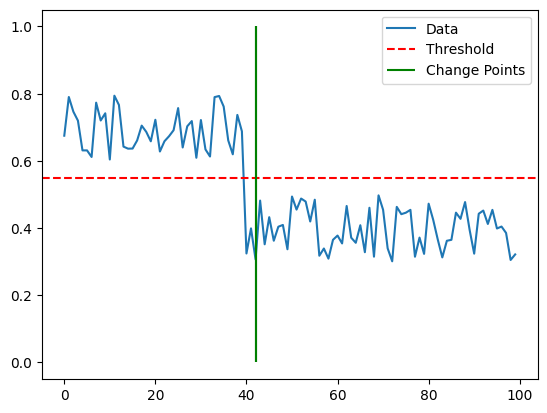

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Generate test data
np.random.seed(42)
times = np.arange(0, 100)
above_threshold = np.random.uniform(0.6, 0.8, 40)
below_threshold = np.random.uniform(0.3, 0.5, 60)
data = np.concatenate([above_threshold, below_threshold])
data = data[::-1]

threshold = 0.55
change_points = threshold_consistency_change_point(data, times, threshold, consistency_length=5, window_size=10, proportion=0.6, stay_above_proportion=0.8)
print("Identified Change Points:", change_points)
# Plot the test data
plt.plot(times, data[::-1], label="Data")
plt.axhline(y=0.55, color='r', linestyle='--', label="Threshold")
plt.vlines(change_points, ymin=0, ymax=1, color='g', label="Change Points")
plt.legend()
plt.show()





Identified Change Points: (array([40, 67, 68, 69, 70]), [40, 67, 68, 69, 70])


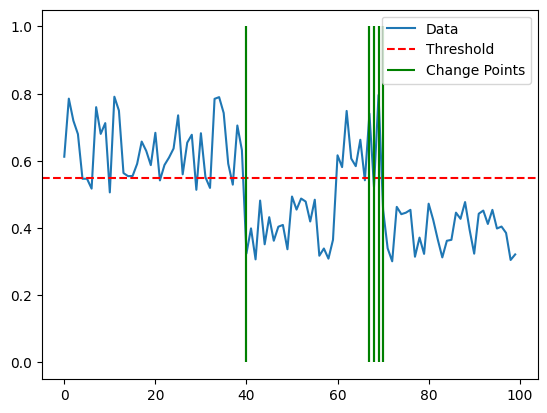

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Generate test data
np.random.seed(42)
times = np.arange(0, 100)
above_threshold1 = np.random.uniform(0.5, 0.8, 40)
below_threshold1 = np.random.uniform(0.3, 0.5, 20)
above_threshold2 = np.random.uniform(0.5, 0.8, 10)
below_threshold2 = np.random.uniform(0.3, 0.5, 30)
data = np.concatenate([above_threshold1, below_threshold1, above_threshold2, below_threshold2])
data = data[::-1]

threshold = 0.55
change_points = threshold_consistency_change_point(data, times, threshold, consistency_length=None, window_size=10, proportion=0.6, stay_above_proportion=0.6)
print("Identified Change Points:", change_points)
# Plot the test data
plt.plot(times, data[::-1], label="Data")
plt.axhline(y=0.55, color='r', linestyle='--', label="Threshold")
plt.vlines(change_points, ymin=0, ymax=1, color='g', label="Change Points")
plt.legend()
plt.show()

Identified Change Points: (array([40, 67, 68, 69, 70]), [40, 67, 68, 69, 70])


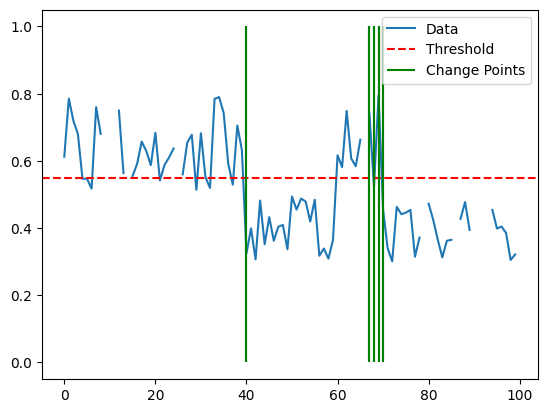

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Generate test data
np.random.seed(42)
times = np.arange(0, 100)
above_threshold1 = np.random.uniform(0.5, 0.8, 40)
below_threshold1 = np.random.uniform(0.3, 0.5, 20)
above_threshold2 = np.random.uniform(0.5, 0.8, 10)
below_threshold2 = np.random.uniform(0.3, 0.5, 30)
data = np.concatenate([above_threshold1, below_threshold1, above_threshold2, below_threshold2])
data = data[::-1]

# Inserting NaNs at random positions
nan_indices = np.random.choice(len(data), 10, replace=False)  # 10 random indices to replace with NaN
data[nan_indices] = np.nan

threshold = 0.55
change_points = threshold_consistency_change_point(data, times, threshold, consistency_length=None, window_size=10, proportion=0.6, stay_above_proportion=0.6)
print("Identified Change Points:", change_points)

# Plot the test data
plt.plot(times, data[::-1], label="Data")
plt.axhline(y=0.55, color='r', linestyle='--', label="Threshold")
plt.vlines(change_points, ymin=0, ymax=1, color='g', label="Change Points")
plt.legend()
plt.show()

Identified Change Points: (array([], dtype=int64), [])


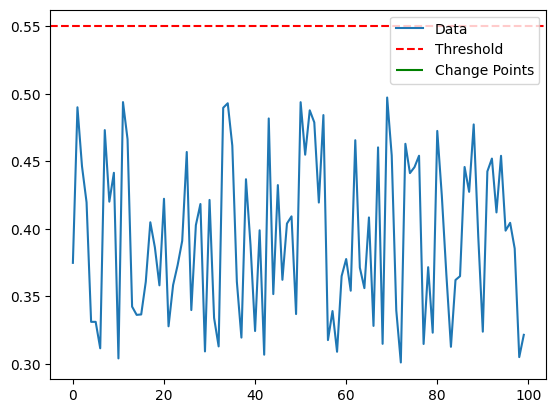

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Generate test data
np.random.seed(42)
times = np.arange(0, 100)

below_threshold = np.random.uniform(0.3, 0.5, 100)
data = np.concatenate([below_threshold])
data = data[::-1]

threshold = 0.55
change_points = threshold_consistency_change_point(data, times, threshold)
print("Identified Change Points:", change_points)
# Plot the test data
plt.plot(times, data[::-1], label="Data")
plt.axhline(y=0.55, color='r', linestyle='--', label="Threshold")
plt.vlines(change_points, ymin=0, ymax=1, color='g', label="Change Points")
plt.legend()
plt.show()

Identified Change Points: []


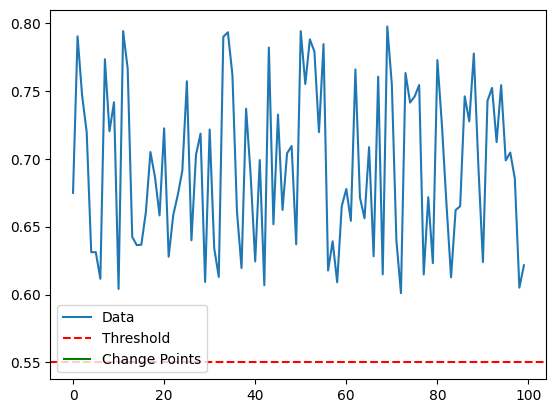

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Generate test data
np.random.seed(42)
times = np.arange(0, 100)

below_threshold = np.random.uniform(0.6, 0.8, 100)
data = np.concatenate([below_threshold])
data = data[::-1]

threshold = 0.55
change_points = threshold_consistency_change_point(data, times, threshold)
print("Identified Change Points:", change_points)
# Plot the test data
plt.plot(times, data[::-1], label="Data")
plt.axhline(y=0.55, color='r', linestyle='--', label="Threshold")
plt.vlines(change_points, ymin=0, ymax=1, color='g', label="Change Points")
plt.legend()
plt.show()

In [16]:
def check_accuracy_timeline(y_pred, y_true, timeline, sleep_stage, window_for_averaging=1, 
                            if_proba=False, classes=None, pre_sleep_window=None, 
                            awake_window=None, rnn_window=None, ifsaveplots=False, output_path=None,
                            ifplot = False, ifsubjecttest = False, ifcrossings = False):
    y_pred, y_true, timeline, sleep_stage = preprocess_data(y_pred, y_true, timeline, sleep_stage)
    
    indices, unique_values_sorted = get_indices_for_unique_values(timeline)
    indices, timegrid = update_indices_with_missing_values(indices, rnn_window)
    
    if if_proba:
        if classes is not None:
            class_idx = np.where(classes != 'Awake')[0][0]
            

            y_pred = y_pred[:,class_idx]
        
        y_pred_mean, y_pred_std = sort_predictions_by_time(y_pred, indices, timegrid)
        sleep_stage_mean, sleep_stage_std = sort_predictions_by_time(sleep_stage, indices, timegrid)
            
            
        if window_for_averaging > 1:
            y_pred_mean = downsample_data(y_pred_mean, window_for_averaging)
            y_pred_std = downsample_data(y_pred_std, window_for_averaging)
            sleep_stage_mean= downsample_data(sleep_stage_mean, window_for_averaging)
            sleep_stage_std = downsample_data(sleep_stage_std, window_for_averaging)
            downsampled_timegrid = downsample_data(timegrid, window_for_averaging)
        

        change_points_times = np.array([])
        final_change_points = np.array([])
        
        if ifcrossings:
            window_size = int(20/window_for_averaging)
            if window_for_averaging > 1:
                dict_pred_time = {downsampled_timegrid[i]: y_pred_mean[i] for i in range(len(y_pred_mean))}
                # sort in descending order according to keys
                sorted_dict_pred_time = dict(sorted(dict_pred_time.items(), reverse=True))
                # get the values of sorted dictionary
                y_probas_sorted = list(sorted_dict_pred_time.values())
                
            
                final_change_points, change_points_times = threshold_consistency_change_point(data = y_probas_sorted,                                                  
                                                                        times = downsampled_timegrid, 
                                                                        threshold=0.5, 
                                                                        window_size=window_size, proportion=0.8, stay_above_proportion=0.6)
            else:
                dict_pred_time = {timegrid[i]: y_pred_mean[i] for i in range(len(y_pred_mean))}
                # sort in descending order according to keys
                sorted_dict_pred_time = dict(sorted(dict_pred_time.items(), reverse=True))
                # get the values of sorted dictionary
                y_probas_sorted = list(sorted_dict_pred_time.values())
            
                final_change_points, change_points_times = threshold_consistency_change_point(data = y_probas_sorted,                                                  
                                                                        times = timegrid, 
                                                                        threshold=0.5, 
                                                                        window_size=window_size, proportion=0.8, stay_above_proportion=0.6)
            
            num_change_points = len(final_change_points)
            if num_change_points == 1:
                time_of_prediction = change_points_times[0]
            else:
                time_of_prediction = np.nan
           

        plot_data(y_pred_mean, y_pred_std, sleep_stage_mean, sleep_stage_std,
                  timegrid, window_for_averaging, rnn_window, 
                  pre_sleep_window, awake_window, ifsaveplots, 
                  output_path, ifplot = ifplot, ifsubjecttest = ifsubjecttest, 
                   change_points_times = final_change_points)

        if window_for_averaging > 1:
            if ifcrossings:
                return num_change_points, time_of_prediction
            else:
                dict_pred_time = {downsampled_timegrid[i]: y_pred_mean[i] for i in range(len(y_pred_mean))}
                return dict_pred_time
        elif ifcrossings:
            return num_change_points, time_of_prediction 
        else: 
            return y_pred_mean

    else:
        accuracies, recall, precision, f1 = calculate_metrics(y_pred, y_true, timegrid, indices)
        if window_for_averaging > 1:
            accuracies = downsample_data(accuracies, window_for_averaging)
            #recall = downsample_data(recall, window_for_averaging)
            #precision = downsample_data(precision, window_for_averaging)
            #f1 = downsample_data(f1, window_for_averaging)

        
        plot_metrics(accuracies, #recall, precision, f1, 
                     timegrid, window_for_averaging, rnn_window, 
                     pre_sleep_window, awake_window, ifsaveplots, 
                     output_path, ifplot = ifplot)
        
        
        return accuracies, recall, precision, f1
        


In [17]:
def evaluate_regression(predictions, y_test, ifsave = False, savepath = None, ifplot = False, iftest = False):

    # check if the predictions are in the correct format
   
    predictions = np.array(predictions)

    # check if the y_test is in the correct format
    
    y_test = np.array(y_test)

    errors = abs(y_test - predictions)
    mape = np.where(y_test != 0, 100 * (errors / y_test), 0)
    accuracy = 100 - np.mean(mape)
    mse = sklearn.metrics.mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = sklearn.metrics.r2_score(y_test, predictions)
    squared_errors = np.square(y_test - predictions)
    weights = 1.0 / (abs(y_test) + 0.1)
    custom_mse = np.mean(weights * squared_errors)

    if ifplot:

        print('Mean Absolute Error:', round(np.mean(errors), 2))
        print('Accuracy:', round(accuracy, 2), '%.')
        print('Mean Squared Error:', round(mse, 2))
        print('Root Mean Squared Error:', round(rmse, 2))
        print('R2:', round(r2, 2))
        print('Custom MSE:', round(custom_mse, 2))

    


    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
    plt.scatter(y_test, predictions, alpha=0.2)
    plt.xlabel('Actual time to sleep onset')
    plt.ylabel('Predicted time to sleep onset')
    plt.title('Actual vs Predicted time to sleep onset')
    if ifsave:
        if iftest:
            plt.savefig(os.path.join(savepath, 'test_actual_vs_predicted.png'))
        else:
            plt.savefig(os.path.join(savepath, 'crossval_actual_vs_predicted.png'))
    if ifplot:
        plt.show()
    plt.close()

    residuals = y_test - predictions
    plt.scatter(y_test, residuals, alpha=0.2)
    plt.plot([y_test.min(), y_test.max()], [0, 0], 'k--', lw=1)
    plt.xlabel('Actual time to sleep onset')
    plt.ylabel('Residuals')
    plt.title('Actual vs Residuals for predicted time to sleep onset')
    if ifsave:
        if iftest:
            plt.savefig(os.path.join(savepath, 'test_actual_vs_residuals.png'))
        else:
            plt.savefig(os.path.join(savepath, 'crossval_actual_vs_residuals.png'))
    if ifplot:
        plt.show()
    plt.close()

    plt.hist(residuals)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Residuals distribution')
    if ifsave:
        if iftest:
            plt.savefig(os.path.join(savepath, 'test_residuals_distribution.png'))
        else:
            plt.savefig(os.path.join(savepath, 'crossval_residuals_distribution.png'))
    if ifplot:
        plt.show()
    plt.close()

    # for each actual, plot the mean residual 
    # round y_test to 0.1 decimal place
    y_test = np.round(y_test, 1)

    predictions_residuals_dict = {}
    for i in range(len(y_test)):
        if y_test[i] not in predictions_residuals_dict:
            predictions_residuals_dict[y_test[i]] = []
        predictions_residuals_dict[y_test[i]].append(residuals[i])
    
    # sort it in ascending order of keys
    predictions_residuals_dict = dict(sorted(predictions_residuals_dict.items()))


    actual_predictions_dict = {}
    for i in range(len(y_test)):
        if y_test[i] not in actual_predictions_dict:
            actual_predictions_dict[y_test[i]] = []
        actual_predictions_dict[y_test[i]].append(predictions[i])
    
    # sort it in ascending order of keys
    actual_predictions_dict = dict(sorted(actual_predictions_dict.items()))

    
    predictions_residuals_mean_dict = {}
    for key in predictions_residuals_dict:
        predictions_residuals_mean_dict[key] = np.mean(predictions_residuals_dict[key])
    
    # sort it in ascending order of keys
    predictions_residuals_mean_dict = dict(sorted(predictions_residuals_mean_dict.items()))


    residuals_std_dict = {}
    for key in predictions_residuals_dict:
        residuals_std_dict[key] = np.std(predictions_residuals_dict[key])
    # sort it in ascending order of keys
    residuals_std_dict = dict(sorted(residuals_std_dict.items()))

    
    actuals_predictions_mean_dict = {}
    for key in actual_predictions_dict:
        actuals_predictions_mean_dict[key] = np.mean(actual_predictions_dict[key])
    
    # sort it in ascending order of keys
    actuals_predictions_mean_dict = dict(sorted(actuals_predictions_mean_dict.items()))

    predictions_std_dict = {}
    for key in actual_predictions_dict:
        predictions_std_dict[key] = np.std(actual_predictions_dict[key])
    # sort it in ascending order of keys
    predictions_std_dict = dict(sorted(predictions_std_dict.items()))

    plt.plot(list(predictions_residuals_mean_dict.keys()), list(predictions_residuals_mean_dict.values()))
    # create std shading
    plt.fill_between(list(predictions_residuals_mean_dict.keys()),
                        np.array(list(predictions_residuals_mean_dict.values())) - np.array(list(residuals_std_dict.values())),
                        np.array(list(predictions_residuals_mean_dict.values())) + np.array(list(residuals_std_dict.values())),
                        alpha=0.2)
    # plot ideal line (x = 0)
    plt.plot([y_test.min(), y_test.max()], [0, 0], 'k--', lw=1, color='red')
    plt.legend(['Mean of residuals', 'STD of residuals', 'Ideal residuals line'])
    plt.xlabel('Actual time to sleep onset')
    plt.ylabel('Residuals for this actual')
    plt.title('Mean residual of predictions for each actual time to sleep onset')
    if ifsave:
        if iftest:
            plt.savefig(os.path.join(savepath, 'test_mean_residuals_across_time.png'))
        else:
            plt.savefig(os.path.join(savepath, 'crossval_mean_residuals_across_time.png'))
    if ifplot:
        plt.show()
    plt.close()

    plt.plot(list(actuals_predictions_mean_dict.keys()), list(actuals_predictions_mean_dict.values()))
    # create std shading
    plt.fill_between(list(actuals_predictions_mean_dict.keys()),
                        np.array(list(actuals_predictions_mean_dict.values())) - np.array(list(predictions_std_dict.values())),
                        np.array(list(actuals_predictions_mean_dict.values())) + np.array(list(predictions_std_dict.values())),
                        alpha=0.2)
    # plot ideal line (x = y)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1, color='red')
    plt.legend(['Mean of predictions', 'STD of predictions', 'Ideal actual = prediction line (x = y)'])
    plt.xlabel('Actual time to sleep onset')
    plt.ylabel('Mean prediction for this actual')
    plt.title('Mean prediction for each actual time to sleep onset')
    if ifsave:
        if iftest:
            plt.savefig(os.path.join(savepath, 'test_mean_predictions_across_time.png'))
        else:
             plt.savefig(os.path.join(savepath, 'crossval_mean_predictions_across_time.png'))
    if ifplot:
        plt.show()
    plt.close()

    test_metrics = {'MAE': round(np.mean(errors), 2), 'Accuracy': round(accuracy, 2), 
    'MSE': round(mse, 2), 'RMSE': round(rmse, 2), 'R2': round(r2, 2), 'custom_MSE': round(custom_mse, 2)}
    return test_metrics

In [18]:
def select_random_participants(df, n_participants):
    """Selects a random sample of participants from the dataset.

    Args:
        df (pandas.DataFrame): The dataset.
        n_participants (int): The number of participants to select.

    Returns:
        pandas.DataFrame: A random sample of participants.
    """
    # Select a random sample of participants
    participants = df['Sbj_ID'].unique()
    np.random.seed(42)
    selected_participants = np.random.choice(participants, n_participants, replace=False)

    for participant in selected_participants:
        # check how many nan values there are in the dataset for this participant
        n_nans = df[df['Sbj_ID'] == participant].isna().sum().sum()
        # if there are more than 20 nan values, select another participant
        while n_nans > 50:
            selected_participants = np.delete(selected_participants, np.where(selected_participants == participant))
            new_participant = np.random.choice(participants, 1, replace=False)
            # check if the new participant is already in the list
            if new_participant not in selected_participants:
                selected_participants = np.append(selected_participants, new_participant)
            else:
                continue
            participant = selected_participants[-1]
            n_nans = df[df['Sbj_ID'] == participant].isna().sum().sum()

    # Filter the dataset
    df = df[df['Sbj_ID'].isin(selected_participants)].copy()

    return df, selected_participants

In [19]:
def test_on_random_participants(data, model, random_seed, ifplot, output_path_new, index, label, brfc_classes, awake_window, pre_sleep_window, ifsaveplots = True): 
    
    """
    Test the model on a random subset of participants. 
    """
    # Set random seed

    # create a new folder for the results
    output_path_new = os.path.join(output_path_new, 'random_participants')
    
    if not os.path.exists(output_path_new):
        os.makedirs(output_path_new)
    
    # intialise empty dataframe to store results
    df_all = pd.DataFrame()

    
    participant_probas = {}
    participant_timeline = {}

    for sbj in data['Sbj_ID'].unique():
        
        # create a folder for each participant
        output_path_participant = os.path.join(output_path_new, str(sbj))
        if ifsaveplots:
            if not os.path.exists(output_path_participant):
                os.makedirs(output_path_participant)


        participant_data = data[data['Sbj_ID'] == sbj].copy()
        y = participant_data['Label']
        timeline = participant_data['Old_label']
        sleep_stages = participant_data['SleepStage']
        X = participant_data.drop(['Label', 'SleepStage', 'Sbj_ID', 'ifCleanOnset', 'Time2Sleep', 'Old_label'], axis=1)

        predictions = model.predict(X)
        prediction_probabilities = model.predict_proba(X)
        

        class_idx = np.where(brfc_classes != 'Awake')[0][0]
        prediction_probas_sleep =prediction_probabilities[:,class_idx]
        participant_probas[sbj] = prediction_probas_sleep
        participant_timeline[sbj] = timeline



        # get the accuracy of each timepoint
        if ifplot:
            print('Predict for participant: ', sbj)

            print('--------------------------------------Evaluate classificaiton ----------------------------------------')
        
        test_metrics = evaluate_classification(y, predictions, prediction_probabilities, index = index, label = label, iftest=True,
                                ifplot=ifplot, output_path=output_path_participant, ifsaveplots= ifsaveplots, classes = brfc_classes, ifvocal = False)
        test_metrics['Sbj_ID'] = sbj
            
        
        
        if ifplot:
            print('------------------------------------------- No averaging ----------------------------------------')
            print('Accuracy')
            
        _, _, _, _ = check_accuracy_timeline(y_pred = predictions, y_true = y,
                                                                    timeline = timeline, sleep_stage = sleep_stages, 
                                                                    window_for_averaging=1, awake_window=awake_window, pre_sleep_window=pre_sleep_window,
                                                                    if_proba=False, classes=None, rnn_window = 0, 
                                                                    ifsaveplots=ifsaveplots, output_path=output_path_participant, ifplot = ifplot)
        if ifplot:
            print('Probability of sleep as predicted by the model')
        
        
        num_crossings, time_of_prediction = check_accuracy_timeline(y_pred = prediction_probabilities, y_true = y,
                                                timeline = timeline, sleep_stage = sleep_stages, 
                                                window_for_averaging=1, awake_window=awake_window, pre_sleep_window=pre_sleep_window,
                                                if_proba=True, classes=brfc_classes, rnn_window = 0, 
                                                ifsaveplots=ifsaveplots, output_path=output_path_participant, ifplot = ifplot, ifsubjecttest = True,
                                                ifcrossings = True)
        test_metrics['num_crossings'] = num_crossings
        test_metrics['time_of_prediction'] = time_of_prediction
    


        

        if ifplot:
            print('-------------------------------Averaging of accuracy over 30 seconds---------------------------------')
            print('Accuracy')
        _, _, _, _ = check_accuracy_timeline(y_pred = predictions, y_true = y,
                                                                    timeline = timeline, sleep_stage = sleep_stages, 
                                                                    window_for_averaging=5, awake_window=awake_window, pre_sleep_window=pre_sleep_window,
                                                                    if_proba=False, classes=None, rnn_window = 0, 
                                                                    ifsaveplots=ifsaveplots, output_path=output_path_participant, ifplot = ifplot)
        if ifplot:
            print('Probability of sleep as predicted by the model')
        
        
        num_crossings_smoothed, time_of_prediction_smoothed = check_accuracy_timeline(y_pred = prediction_probabilities, y_true = y,
                                                                timeline = timeline, sleep_stage = sleep_stages, 
                                                                window_for_averaging=5, awake_window=awake_window, pre_sleep_window=pre_sleep_window,
                                                                if_proba=True, classes=brfc_classes, rnn_window = 0, 
                                                                ifsaveplots=ifsaveplots, output_path=output_path_participant, ifplot = ifplot, ifsubjecttest = True, 
                                                                ifcrossings = True)
        test_metrics['num_crossings_smoothed'] = num_crossings_smoothed
        test_metrics['time_of_prediction_smoothed'] = time_of_prediction_smoothed 
        next_index = len(df_all)
        df = pd.DataFrame(test_metrics, index=[next_index])
        df_all = pd.concat([df_all, df])

    df_all.to_csv(os.path.join(output_path_new, 'classification_results_random_participants.csv'))

    # calculate how many participants have only one crossing in df_all['num_crossings'] out of all the participants
    num_participants_one_crossing = len(df_all[df_all['num_crossings'] == 1])
    num_participants = len(df_all)
    one_crossing_percentage = num_participants_one_crossing/num_participants * 100
    mean_time_of_prediction = np.mean(df_all['time_of_prediction'][df_all['num_crossings'] == 1])
    std_time_of_prediction = np.std(df_all['time_of_prediction'][df_all['num_crossings'] == 1])


    num_participants_one_crossing_smoothed = len(df_all[df_all['num_crossings_smoothed'] == 1])
    one_crossing_percentage_smoothed = num_participants_one_crossing_smoothed/num_participants * 100
    mean_time_of_prediction_smoothed = np.mean(df_all['time_of_prediction_smoothed'][df_all['num_crossings_smoothed'] == 1])
    std_time_of_prediction_smoothed = np.std(df_all['time_of_prediction_smoothed'][df_all['num_crossings_smoothed'] == 1])

    print(f'Percentage of participants with only one crossing: {one_crossing_percentage}%')
    print(f'Mean time of prediction for participants with only one crossing: {mean_time_of_prediction} minutes')
    print(f'STD of time of prediction for participants with only one crossing: {std_time_of_prediction} minutes')


    print(f'Percentage of participants with only one crossing (smoothed): {one_crossing_percentage_smoothed}%')
    print(f'Mean time of prediction for participants with only one crossing (smoothed): {mean_time_of_prediction_smoothed} minutes')
    print(f'STD of time of prediction for participants with only one crossing (smoothed): {std_time_of_prediction_smoothed} minutes')
    
    output_dict = {'one_crossing_percentage': one_crossing_percentage, 'mean_time_of_prediction': mean_time_of_prediction,
                    'std_time_of_prediction': std_time_of_prediction, 'one_crossing_percentage_smoothed': one_crossing_percentage_smoothed,
                    'mean_time_of_prediction_smoothed': mean_time_of_prediction_smoothed, 'std_time_of_prediction_smoothed': std_time_of_prediction_smoothed}
    
    
    return participant_probas, participant_timeline, output_dict

In [20]:
def test_reg_on_random_participants(participant_probas, participant_timeline, model, random_seed, ifplot, output_path_new, index, brfc_classes, awake_window, pre_sleep_window): 
    
    """
    Test the model on a random subset of participants. 
    """
    # Set random seed

    # create a new folder for the results
    output_path_new = os.path.join(output_path_new, 'random_participants')
    if not os.path.exists(output_path_new):
        os.makedirs(output_path_new)
    
    # intialise empty dataframe to store results
    df_all = pd.DataFrame()

    
    for sbj in list(participant_probas.keys()):
        # create a folder for each participant
        
        output_path_participant = os.path.join(output_path_new, str(sbj))
        if not os.path.exists(output_path_participant):
            os.makedirs(output_path_participant)

        y_test_timeline = participant_timeline[sbj]
        probas = participant_probas[sbj]

        # check if y_test_timeline and probas are the same length
        if len(y_test_timeline) != len(probas):
            error = 'y_test_timeline and probas are not the same length'

        if np.isnan(probas).any():
                    for i in range(len(probas)):
                        if np.isnan(probas[i]):
                            # omit the corresponding y_times2sleep
                            y_test_timeline.pop(i)
                            probas.pop(i)


        probas = np.array(probas).reshape(-1, 1)
        

        timeline_predicted = model.predict(probas)
       

        # get the accuracy of each timepoint
        if ifplot:
            print('Predict for participant: ', sbj)

            print('--------------------------------------Evaluate regression ----------------------------------------')
        
        test_metrics = evaluate_regression(timeline_predicted, y_test_timeline, iftest=True,
                                ifplot=ifplot, savepath =output_path_participant, ifsave= True)
        
        df = pd.DataFrame(test_metrics, index = [sbj])
        df_all = pd.concat([df_all, df])

    df_all.to_csv(os.path.join(output_path_new, 'regression_results_random_participants.csv'))
    
   

In [21]:
import matplotlib.pyplot as plt
import os

# Create a function for plotting the sorted feature importances in a long horizontal bar chart and increased font size

def plot_feature_importances(model, X, output_path, ifsaveplots = False, save_name = 'feature_importances.png', ifplot = True):
    save_path = os.path.join(output_path, save_name)
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    names = [X.columns[i] for i in indices]
    
    fig, ax = plt.subplots(figsize=(16, 24), dpi=80)
    ax.barh(range(X.shape[1]), importances[indices], align='center')
    ax.set_yticks(range(X.shape[1]))
    ax.set_yticklabels(names, fontsize=16)
    ax.set_xlabel('Importance')
    ax.set_ylabel('Feature')
    ax.set_title('Feature importances')
    if ifplot:
        plt.show()
    if ifsaveplots:
        fig.savefig(save_path, bbox_inches='tight')
    plt.close(fig)
    


    return importances, indices, names

In [22]:

def train_test_split_sbjs(mydata_no_nan, test_size = 0.2, random_seed = 42):
 
    # assert that the data has no NaNs
    assert mydata_no_nan.isnull().sum().sum() == 0, 'There are NaNs in the data'
    
    # get the unique subjects
    unique_subjects = mydata_no_nan['Sbj_ID'].unique()

    # define the train size
    train_size = 1 - test_size

    # define the number of subjects in the test set

    test_size_subjects = int(test_size * len(unique_subjects))

    # Select the unique subjects for the test set

    test_subjects = random.sample(list(unique_subjects), test_size_subjects)

    # Select the unique subjects for the training set
    train_subjects = [x for x in unique_subjects if x not in test_subjects]

    # Create the test and training sets
    test_set = mydata_no_nan[mydata_no_nan['Sbj_ID'].isin(test_subjects)]
    train_set = mydata_no_nan[mydata_no_nan['Sbj_ID'].isin(train_subjects)]

    # Create X and y from dataframes to use in scikit-learn (drop Label, SleepStage, Sbj_ID and ifCleanOnset columns)

    X_train = train_set.drop(['Label', 'SleepStage', 'Sbj_ID', 'ifCleanOnset', 'Time2Sleep'], axis=1)
    y_train = train_set['Label']
    X_test = test_set.drop(['Label', 'SleepStage', 'Sbj_ID', 'ifCleanOnset', 'Time2Sleep'], axis=1)
    y_test = test_set['Label']


    # Create list of sbj_IDs for each sample in the training and test sets
    sbj_train_set = train_set['Sbj_ID'].copy()
    sbj_test_set = test_set['Sbj_ID'].copy()

    # Turn the sbj_IDs into a list
    sbj_train_set = sbj_train_set.tolist()
    sbj_test_set = sbj_test_set.tolist()
    


    return X_train, y_train, X_test, y_test, sbj_train_set, sbj_test_set

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming feature_importances is a 2D array of shape (len(pre_sleep_times), len(awake_times))
# And pre_sleep_times and awake_times are lists of the unique values you've trained with

def plot_feature_heatmap(feature_importances, pre_sleep_times, awake_times, feature_name):
    plt.figure(figsize=(10, 8))
    sns.heatmap(feature_importances, annot=True, cmap="YlGnBu", 
                xticklabels=awake_times, yticklabels=pre_sleep_times)
    plt.title(f'Feature Importance for {feature_name}')
    plt.xlabel('Awake Time')
    plt.ylabel('Pre Sleep Time')
    plt.show()



In [24]:
def get_rid_of_nans(probabilities, y_times2sleep = None):
    if np.isnan(probabilities).any():
        for i in range(len(probabilities)):
            if np.isnan(probabilities[i]):
                # omit the corresponding y_times2sleep
                if y_times2sleep is not None:
                    y_times2sleep.pop(i)
                probabilities.pop(i)
    return probabilities, y_times2sleep

In [25]:
def update_thresholds(epoch, initial_sleep_onset_threshold, initial_awake_threshold, awake_delta, sleep_delta, schedule_period=1):
    """
    Updates the thresholds based on a target convergence point.

    Parameters:
    - epoch: current epoch number
    - initial_awake_threshold: initial awake threshold 
    - initial_sleep_onset_threshold: initial sleep onset threshold
    - convergence_point: point at which the thresholds should converge
    - total_epochs: total epochs for which the training is scheduled
    - schedule_period: epochs after which thresholds are adjusted. Default is 10 epochs.

    Returns:
    - New awake and sleep_onset thresholds
    """
    
    # Adjusting both thresholds based on the epoch 
    if epoch % schedule_period == 0 :
        initial_awake_threshold -= awake_delta
        initial_sleep_onset_threshold += sleep_delta

    return round(initial_sleep_onset_threshold, 1), round(initial_awake_threshold,1)

In [26]:
# import balanced random forest classifier
import warnings
from imblearn.ensemble import BalancedRandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
# import random forest regressor
from sklearn.ensemble import RandomForestRegressor
def explore_classifier_sleep_probabilities_schedule(classifier_type, initial_pre_sleep, initial_awake, convergence_points, 
                                                    total_epochs, mydata_normalised_preprocessed_one_hot, 
                                                    selected_participant_data = None, selected_participants = None,
                                                    output_path = 'Balanced_Random_Forest_Schedule', ifsaveplots = True, 
                                                    ifplot = True, random_seed = 42, convergence_sensitivity = 0.1, ifresetresults = False):

    """
    This function is used to explore the probabilities and accuracies outputted by classifier in predicting sleep onset.
    """
    
    warnings.filterwarnings('ignore', category=RuntimeWarning)
    warnings.filterwarnings('ignore', category=UserWarning)

    #mydata_normalised_preprocessed_one_hot.dropna(inplace=True)


    # Initialize a DataFrame to store results
    columns = ['convergence_point', 'ifconverged', 'pre_sleep_window', 'awake_window', 'pos_class_weight',
           'crossval_accuracy', 'crossval_precision', 
           'crossval_recall', 'crossval_f1_weighted',
           'crossval_f1_macro', 'crossval_f1_pre_sleep', 'crossval_f1_awake'
           'crossval_auc', 'crossval_mae', 'crossval_mse', 'crossval_rmse', 'crossval_r2',
            'crossval_custom_mse', 'test_accuracy', 'test_precision',
           'test_recall', 'test_f1_weighted', 'test_f1_macro', 
           'test_f1_pre_sleep', 'test_f1_awake',  'test_auc', 'test_one_crossing_percentage', 
           'test_mean_predicition_time', 'test_std_predicition_time', 
           'test_one_crossing_percentage_smoothed', 'test_mean_predicition_time_smoothed',
            'test_std_predicition_time_smoothed',
           'test_mae', 'test_mse', 'test_rmse', 'test_r2', 'test_custom_mse']
            
    results_df = pd.DataFrame(columns=columns)
    results_dir = output_path

    if not os.path.exists(results_dir):
        os.makedirs(results_dir)

    if ifresetresults:
        results_df.to_csv(os.path.join(results_dir, 'results.csv'))
    
    # check if results.csv already exists
    if os.path.exists(os.path.join(results_dir, 'results.csv')):
        results_df = pd.read_csv(os.path.join(results_dir, 'results.csv'), index_col=0)
    else:
        # save the empty dataframe
        results_df.to_csv(os.path.join(results_dir, 'results.csv'))


    for convergence_point in convergence_points:
        print('Convergence point: ', convergence_point)
        folder_name = f'{convergence_point}_convergence_point'
        output_path_conv = os.path.join(results_dir, folder_name)
        if not os.path.exists(output_path_conv):
            os.makedirs(output_path_conv)

        distance_to_convergence_sleep_onset = convergence_point - initial_pre_sleep
        # round to 1 decimal place
        sleep_onset_delta = round(distance_to_convergence_sleep_onset / total_epochs, 1)

        distance_to_convergence_awake = initial_awake - convergence_point
        # round to 1 decimal place
        awake_delta = round(distance_to_convergence_awake / total_epochs, 1)
        
        brfc = BalancedRandomForestClassifier(n_estimators=50, random_state=42, sampling_strategy = 'all', replacement = True, warm_start = True)
        
        pre_sleep_window = initial_pre_sleep
        awake_window = initial_awake
        for epoch in range(total_epochs):
            if epoch != 0:
                n_estimators = brfc.n_estimators + 10
                brfc.set_params(n_estimators=n_estimators)

            if abs(pre_sleep_window - convergence_point) < convergence_sensitivity:
                print('Sleep onset threshold has converged')
                break

            if abs(awake_window - convergence_point) < convergence_sensitivity:
                print('Awake threshold has converged')
                break

            pre_sleep_window, awake_window = update_thresholds(epoch,  pre_sleep_window, awake_window, awake_delta, sleep_onset_delta)
            
            folder_name = f'{epoch}_epoch_{pre_sleep_window}_presleep_{awake_window}_awake'
            if not os.path.exists(os.path.join(output_path_conv, folder_name)):
                os.makedirs(os.path.join(output_path_conv, folder_name))

            output_path_new = os.path.join(output_path_conv, folder_name)
            
            
            
            #print('New sleep onset threshold: ', sleep_onset_threshold) 
            #print('New awake threshold: ', awake_threshold)

            # Create a new dataframe to store the probabilities and accuracies
            mydata_all_labels = mydata_normalised_preprocessed_one_hot.copy()
            mydata_all_labels['Old_label'] = mydata_all_labels['Label'].copy()

            if selected_participants is not None:
                selected_participant_data2process = selected_participant_data.copy()
                selected_participant_data2process['Old_label'] = selected_participant_data2process['Label'].copy()
                selected_participant_data2process['Label'] = np.where(selected_participant_data2process['Label'] <= pre_sleep_window, f'{pre_sleep_window} minutes before sleep', 'Awake')

            
            # Swap Label columns into categorical '5 minutes before sleep'  (if Label <= 5) and '15+ minutes before sleep' in the other case
            index = [f'{pre_sleep_window} minutes before sleep', 'Awake']
            label = [f'{pre_sleep_window} minutes before sleep', 'Awake']
            mydata_all_labels['Label'] = np.where(mydata_all_labels['Label'] <= pre_sleep_window, f'{pre_sleep_window} minutes before sleep', 'Awake')
            

            print('\n')
            print('_'*110)
            print(f'                                    PRE-SLEEP WINDOW: {pre_sleep_window} minutes                                   ')
            print('_'*110)
            print('\n')

            print(f'--------------------------------------- AWAKE-WINDOW: {awake_window}+ minutes ------------------------------------------------')
            print('\n')


            # Try classification on 5 minutes before sleep and 15+ minutes before sleep
            mydata_for_training = mydata_normalised_preprocessed_one_hot[(mydata_normalised_preprocessed_one_hot['Label'] <= pre_sleep_window) | (mydata_normalised_preprocessed_one_hot['Label'] > awake_window)].copy()

            # Swap Label columns into categorical '5 minutes before sleep'  (if Label <= 5) and '15+ minutes before sleep' in the other case
            mydata_for_training['Label'] = np.where(mydata_for_training['Label'] <= pre_sleep_window, f'{pre_sleep_window} minutes before sleep', 'Awake')

            # Split test, and training sets for training the model
            X_train, y_train, X_test, y_test, sbj_train_set, sbj_test_set = train_test_split_sbjs(mydata_for_training, test_size = 0.2, random_seed = 42)

            # Get the timeline for checking the model performance
            X_all, y_all, y_old_all, y_sleepstage_all = get_timeline(mydata_all_labels)

            # get only the subjects from sbj_test_set_5_5 in mydata_all_labels_5
            mydata_all_labels_test = mydata_all_labels[mydata_all_labels['Sbj_ID'].isin(sbj_test_set)]

            # Get the timeline for checking the model performance
            X_all_test, y_all_test, y_old_all_test, y_sleepstage_all_test = get_timeline(mydata_all_labels_test)
            
            # get the positive class weight for y_all
            pos_class_weight = len(y_all[y_all == 'Awake'])/len(y_all[y_all == f'{pre_sleep_window} minutes before sleep'])

            if classifier_type == 'brfc':
                # Create a random forest classifier
            
                brfc.fit(X_train, y_train)
                    
                # get the sorted feature importances and their names
                _, _, _ = plot_feature_importances(brfc, X_train, ifsaveplots = ifsaveplots, output_path=output_path_new, ifplot = ifplot)
             

                brfc_classes = brfc.classes_

                brfc_predictions = brfc.predict(X_all) 
                print('Predictions:', brfc_predictions)
                brfc_predictions_proba = brfc.predict_proba(X_all)
                brfc_predictions_test_proba = brfc.predict_proba(X_all_test)
                brfc_predictions_test = brfc.predict(X_all_test)

                # transform predicitons and labels for evalution 
                

                crossval_metrics = evaluate_classification(y_all, brfc_predictions, brfc_predictions_proba, index= index, label = label,
                                                        ifplot=ifplot, output_path=output_path_new, ifsaveplots= True, classes = brfc_classes)
                crossval_metrics['pos_class_weight'] = pos_class_weight
                
                test_metrics = evaluate_classification(y_all_test, brfc_predictions_test, brfc_predictions_test_proba, index= index, label = label, iftest=True,
                                                        ifplot=ifplot, output_path=output_path_new, ifsaveplots= True, classes = brfc_classes)
                
                _, _, participant_dict = test_on_random_participants(mydata_all_labels_test, brfc, random_seed = 42, 
                                                                                            ifplot = False, output_path_new = output_path_new, index = index, label = label,
                                                                                            ifsaveplots = False, brfc_classes = brfc_classes, awake_window = awake_window, 
                                                                                         pre_sleep_window = pre_sleep_window)
                
                if selected_participants is not None:
                    participant_probas, participant_timeline, _= test_on_random_participants(selected_participant_data2process, brfc, random_seed = 42, 
                                                                                            ifplot = False, output_path_new = output_path_new, index = index, label = label, 
                                                                                            brfc_classes = brfc_classes, awake_window = awake_window, 
                                                                                            pre_sleep_window = pre_sleep_window)

                # get the accuracy of each timepoint
                print('Now trying only on the unseen test data')
                print('------------------------------------------- No averaging ----------------------------------------')
                print('Accuracy')
                
                _, _, _, _ = check_accuracy_timeline(y_pred = brfc_predictions_test, y_true = y_all_test,
                                                                            timeline = y_old_all_test, sleep_stage = y_sleepstage_all_test, 
                                                                            window_for_averaging=1, awake_window=awake_window, pre_sleep_window=pre_sleep_window,
                                                                            if_proba=False, classes=None, rnn_window = 0, 
                                                                            ifsaveplots=True, output_path=output_path_new, ifplot = ifplot)
                print('Probability of sleep as predicted by the model')
            
                
                _ = check_accuracy_timeline(y_pred = brfc_predictions_test_proba, y_true = y_all_test,
                                                        timeline = y_old_all_test, sleep_stage = y_sleepstage_all_test, 
                                                        window_for_averaging=1, awake_window=awake_window, pre_sleep_window=pre_sleep_window,
                                                        if_proba=True, classes=brfc_classes, rnn_window = 0, 
                                                        ifsaveplots=True, output_path=output_path_new, ifplot = ifplot)



                print('-------------------------------Averaging of accuracy over 30 seconds---------------------------------')
                print('Accuracy')
                _, _, _, _ = check_accuracy_timeline(y_pred = brfc_predictions_test, y_true = y_all_test,
                                                                            timeline = y_old_all_test, sleep_stage = y_sleepstage_all_test, 
                                                                            window_for_averaging=5, awake_window=awake_window, pre_sleep_window=pre_sleep_window,
                                                                            if_proba=False, classes=None, rnn_window = 0, 
                                                                            ifsaveplots=True, output_path=output_path_new, ifplot = ifplot)
                print('Probability of sleep as predicted by the model')
                
                y_pred_sorted = check_accuracy_timeline(y_pred = brfc_predictions_test_proba, y_true = y_all_test,
                                                        timeline = y_old_all_test, sleep_stage = y_sleepstage_all_test, 
                                                        window_for_averaging=5, awake_window=awake_window, pre_sleep_window=pre_sleep_window,
                                                        if_proba=True, classes=brfc_classes, rnn_window = 0, 
                                                        ifsaveplots=True, output_path=output_path_new, ifplot = ifplot)

                
                # Perform regression to predict the time to sleep onset

                y_pred_sorted = check_accuracy_timeline(y_pred = brfc_predictions_proba, y_true = y_all,
                                                        timeline = y_old_all, sleep_stage = y_sleepstage_all, 
                                                        window_for_averaging=5, awake_window=awake_window, pre_sleep_window=pre_sleep_window,
                                                        if_proba=True, classes=brfc_classes, rnn_window = 0, 
                                                        ifsaveplots=False, output_path=output_path_new, ifplot = ifplot)

                
                # From averqaged probabilities, try to do regression to predict the time to sleep onset
                y_times2sleep = list(y_pred_sorted.keys())
                probabilities = list(y_pred_sorted.values())
                probabilities, y_times2sleep = get_rid_of_nans(probabilities, y_times2sleep)

                # build a regressor to predict the time to sleep onset using svm
                #svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
                rf = RandomForestRegressor(n_estimators=150, random_state=42)
                    
                probabilities = np.array(probabilities).reshape(-1, 1)

                rf.fit(probabilities, y_times2sleep)
                rf_predictions = rf.predict(probabilities)
                crossval_regression_metrics = evaluate_regression(rf_predictions, y_times2sleep, ifsave = ifsaveplots, 
                                                                ifplot=ifplot, savepath=output_path_new, iftest = False)

                # get the predictions for the test data 
                class_idx = np.where(brfc_classes != 'Awake')[0][0]
                probs_test = brfc_predictions_test_proba[:,class_idx]
                probs_test, y_old_all_test = get_rid_of_nans(probs_test, y_old_all_test)
                y_pred_times2sleep = rf.predict(probs_test.reshape(-1, 1))
                test_regression_metrics = evaluate_regression(y_pred_times2sleep, y_old_all_test, ifsave = ifsaveplots, 
                                                                ifplot=ifplot, savepath=output_path_new, iftest = True)
                if selected_participants is not None:
                    test_reg_on_random_participants(participant_probas, participant_timeline, rf, random_seed, ifplot, 
                                                    output_path_new, index, brfc_classes, awake_window, pre_sleep_window)

                # Add results to dataframe
                ifconverged = 0
                if epoch + 1 == total_epochs:
                    ifconverged = 1

                new_row = pd.DataFrame({
                        'convergence_point': [convergence_point],
                        'ifconverged': [ifconverged],
                        'pre_sleep_window': [pre_sleep_window],
                        'awake_window': [awake_window],
                        'pos_class_weight': [crossval_metrics['pos_class_weight']],
                        'crossval_accuracy': [crossval_metrics['accuracy']],
                        'crossval_precision': [crossval_metrics['precision']],
                        'crossval_recall': [crossval_metrics['recall']],
                        'crossval_f1_weighted': [crossval_metrics['f1_weighted']],
                        'crossval_f1_macro': [crossval_metrics['f1_macro']],
                        'crossval_f1_pre_sleep': [crossval_metrics['f1_pre_sleep']],
                        'crossval_f1_awake': [crossval_metrics['f1_awake']],
                        'crossval_auc': [crossval_metrics['auc']],
                        'cross_val_mae': [crossval_regression_metrics['MAE']],
                        'cross_val_mse': [crossval_regression_metrics['MSE']],
                        'cross_val_rmse': [crossval_regression_metrics['RMSE']],
                        'cross_val_r2': [crossval_regression_metrics['R2']],
                        'cross_val_custom_mse': [crossval_regression_metrics['custom_MSE']],
                        'test_accuracy': [test_metrics['accuracy']],
                        'test_precision': [test_metrics['precision']],
                        'test_recall': [test_metrics['recall']],
                        'test_f1_weighted': [test_metrics['f1_weighted']],
                        'test_f1_macro': [test_metrics['f1_macro']],
                        'test_f1_pre_sleep': [test_metrics['f1_pre_sleep']],
                        'test_f1_awake': [test_metrics['f1_awake']],
                        'test_auc': [test_metrics['auc']],
                        'test_one_crossing_percentage': [participant_dict['one_crossing_percentage']],
                        'test_mean_predicition_time': [participant_dict['mean_time_of_prediction']],
                        'test_std_predicition_time': [participant_dict['std_time_of_prediction']],
                        'test_one_crossing_percentage_smoothed': [participant_dict['one_crossing_percentage_smoothed']],
                        'test_mean_predicition_time_smoothed': [participant_dict['mean_time_of_prediction_smoothed']],
                        'test_std_predicition_time_smoothed': [participant_dict['std_time_of_prediction_smoothed']],
                        'test_mae': [test_regression_metrics['MAE']],
                        'test_mse': [test_regression_metrics['MSE']],
                        'test_rmse': [test_regression_metrics['RMSE']],
                        'test_r2': [test_regression_metrics['R2']],
                        'test_custom_mse':[test_regression_metrics['custom_MSE']]
                    })
                
                # Open the results dataframe and add the new results
                results_df_all = pd.read_csv(os.path.join(results_dir, 'results.csv'))
                results_df_all = pd.concat([results_df_all, new_row], ignore_index=True)
                results_df_all.to_csv(os.path.join(results_dir, 'results.csv'), index=False) 
                del results_df_all
                del new_row
                
                

            del y_old_all
            del y_sleepstage_all
            del y_old_all_test
            del y_sleepstage_all_test
            del mydata_all_labels
            del mydata_all_labels_test
            del X_train
            del y_train
            del X_test
            del y_test
            del sbj_train_set
            del sbj_test_set
            del X_all
            del y_all
            del X_all_test
            del y_all_test
                

In [27]:
import matplotlib.pyplot as plt
import os

# Create a function for plotting the sorted feature importances in a long horizontal bar chart and increased font size

def plot_feature_importances(model, X, output_path, ifsaveplots = False, save_name = 'feature_importances.png', ifplot = True):
    save_path = os.path.join(output_path, save_name)
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    names = [X.columns[i] for i in indices]
    
    fig, ax = plt.subplots(figsize=(16, 24), dpi=80)
    ax.barh(range(X.shape[1]), importances[indices], align='center')
    ax.set_yticks(range(X.shape[1]))
    ax.set_yticklabels(names, fontsize=16)
    ax.set_xlabel('Importance')
    ax.set_ylabel('Feature')
    ax.set_title('Feature importances')
    if ifplot:
        plt.show()
    if ifsaveplots:
        fig.savefig(save_path, bbox_inches='tight')
    plt.close(fig)
    


    return importances, indices, names

In [28]:

def train_test_split_sbjs(mydata_no_nan, test_size = 0.2, random_seed = 42):
 
    # assert that the data has no NaNs
    assert mydata_no_nan.isnull().sum().sum() == 0, 'There are NaNs in the data'
    
    # get the unique subjects
    unique_subjects = mydata_no_nan['Sbj_ID'].unique()

    # define the train size
    train_size = 1 - test_size

    # define the number of subjects in the test set

    test_size_subjects = int(test_size * len(unique_subjects))

    # Select the unique subjects for the test set

    test_subjects = random.sample(list(unique_subjects), test_size_subjects)

    # Select the unique subjects for the training set
    train_subjects = [x for x in unique_subjects if x not in test_subjects]

    # Create the test and training sets
    test_set = mydata_no_nan[mydata_no_nan['Sbj_ID'].isin(test_subjects)]
    train_set = mydata_no_nan[mydata_no_nan['Sbj_ID'].isin(train_subjects)]

    # Create X and y from dataframes to use in scikit-learn (drop Label, SleepStage, Sbj_ID and ifCleanOnset columns)

    X_train = train_set.drop(['Label', 'SleepStage', 'Sbj_ID', 'ifCleanOnset', 'Time2Sleep'], axis=1)
    y_train = train_set['Label']
    X_test = test_set.drop(['Label', 'SleepStage', 'Sbj_ID', 'ifCleanOnset', 'Time2Sleep'], axis=1)
    y_test = test_set['Label']


    # Create list of sbj_IDs for each sample in the training and test sets
    sbj_train_set = train_set['Sbj_ID'].copy()
    sbj_test_set = test_set['Sbj_ID'].copy()

    # Turn the sbj_IDs into a list
    sbj_train_set = sbj_train_set.tolist()
    sbj_test_set = sbj_test_set.tolist()
    


    return X_train, y_train, X_test, y_test, sbj_train_set, sbj_test_set

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming feature_importances is a 2D array of shape (len(pre_sleep_times), len(awake_times))
# And pre_sleep_times and awake_times are lists of the unique values you've trained with

def plot_feature_heatmap(feature_importances, pre_sleep_times, awake_times, feature_name):
    plt.figure(figsize=(10, 8))
    sns.heatmap(feature_importances, annot=True, cmap="YlGnBu", 
                xticklabels=awake_times, yticklabels=pre_sleep_times)
    plt.title(f'Feature Importance for {feature_name}')
    plt.xlabel('Awake Time')
    plt.ylabel('Pre Sleep Time')
    plt.show()



In [30]:
selected_participants = np.array(selected_participants)

In [31]:
selected_participants

array([ 323,  694,  912, 1476, 2040, 2651, 2780, 3920, 4014, 4190, 4437,
       5749, 5782, 5838, 5876, 6454,   10, 2574, 5489, 5881])

In [32]:
selected_participants_data

,Label,Sbj_ID,Age,Gender,Race1,Race2,Race3,Race4,ifCleanOnset,Time2Sleep,...,wrseltr5,slpapnea5,cpap5,dntaldv5,uvula5,insmnia5,rstlesslgs5,whiirs5c,epslpscl5c,hoostmeq5c
0,29.9,323,79,1,1.0,0.0,0.0,0.0,1,68.5,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,11.0,15.0
1,29.8,323,79,1,1.0,0.0,0.0,0.0,1,68.5,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,11.0,15.0
2,29.7,323,79,1,1.0,0.0,0.0,0.0,1,68.5,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,11.0,15.0
3,29.6,323,79,1,1.0,0.0,0.0,0.0,1,68.5,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,11.0,15.0
4,29.5,323,79,1,1.0,0.0,0.0,0.0,1,68.5,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,11.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.4,5881,62,0,0.0,1.0,0.0,0.0,1,58.5,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0,15.0
5996,0.3,5881,62,0,0.0,1.0,0.0,0.0,1,58.5,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0,15.0
5997,0.2,5881,62,0,0.0,1.0,0.0,0.0,1,58.5,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0,15.0
5998,0.1,5881,62,0,0.0,1.0,0.0,0.0,1,58.5,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0,15.0


## Try and see if the loop works

In [33]:


classifier_type = 'brfc'

explore_classifier_sleep_probabilities_schedule(classifier_type, initial_pre_sleep = 2, initial_awake = 30, convergence_points = [10], 
                                                    total_epochs = 5, mydata_normalised_preprocessed_one_hot = data_train,
                                                    selected_participant_data = selected_participants_data, selected_participants = selected_participants,
                                                    output_path = 'Balanced_Random_Forest_Schedule_perfectly_clean_onset', ifsaveplots = True, 
                                                    ifplot = False, random_seed = 42, ifresetresults=True, convergence_sensitivity=0.05)

Convergence point:  10


______________________________________________________________________________________________________________
                                    PRE-SLEEP WINDOW: 3.6 minutes                                   
______________________________________________________________________________________________________________


--------------------------------------- AWAKE-WINDOW: 26.0+ minutes ------------------------------------------------


Predictions: ['Awake' 'Awake' 'Awake' ... '3.6 minutes before sleep'
 '3.6 minutes before sleep' '3.6 minutes before sleep']
Accuracy: 0.7256140975436098
                          precision    recall  f1-score   support

3.6 minutes before sleep       0.29      0.70      0.41      1529
                   Awake       0.94      0.73      0.82      9707

                accuracy                           0.73     11236
               macro avg       0.61      0.72      0.62     11236
            weighted avg       0.85      0.73

## Hypereparameter tune for window selection

In [34]:
convergence_points = [3, 4, 5]
classifier_type = 'brfc'

explore_classifier_sleep_probabilities_schedule(classifier_type, initial_pre_sleep = 2, initial_awake = 30, convergence_points = convergence_points, 
                                                    total_epochs = 5, mydata_normalised_preprocessed_one_hot = data_train,
                                                    selected_participant_data = selected_participants_data, 
                                                    selected_participants = selected_participants,
                                                    output_path = 'Balanced_Random_Forest_Schedule_perfectly_clean_onset', ifsaveplots = True, 
                                                    ifplot = False, random_seed = 42, convergence_sensitivity = 0.05)


Convergence point:  3


______________________________________________________________________________________________________________
                                    PRE-SLEEP WINDOW: 2.2 minutes                                   
______________________________________________________________________________________________________________


--------------------------------------- AWAKE-WINDOW: 24.6+ minutes ------------------------------------------------


Predictions: ['Awake' 'Awake' 'Awake' ... '2.2 minutes before sleep'
 '2.2 minutes before sleep' '2.2 minutes before sleep']
Accuracy: 0.7600420978775654
                          precision    recall  f1-score   support

2.2 minutes before sleep       0.22      0.74      0.34       965
                   Awake       0.97      0.76      0.85     10437

                accuracy                           0.76     11402
               macro avg       0.60      0.75      0.60     11402
            weighted avg       0.91      0.76 

In [35]:
convergence_points = [6, 7, 8] 
classifier_type = 'brfc'

explore_classifier_sleep_probabilities_schedule(classifier_type, initial_pre_sleep = 2, initial_awake = 30, convergence_points = convergence_points, 
                                                    total_epochs = 5, mydata_normalised_preprocessed_one_hot = data_train,
                                                    selected_participant_data = selected_participants_data, selected_participants = selected_participants,
                                                    output_path = 'Balanced_Random_Forest_Schedule_perfectly_clean_onset', ifsaveplots = True, 
                                                    ifplot = False, random_seed = 42, convergence_sensitivity = 0.05)


Convergence point:  6


______________________________________________________________________________________________________________
                                    PRE-SLEEP WINDOW: 2.8 minutes                                   
______________________________________________________________________________________________________________


--------------------------------------- AWAKE-WINDOW: 25.2+ minutes ------------------------------------------------


Predictions: ['Awake' 'Awake' 'Awake' ... '2.8 minutes before sleep'
 '2.8 minutes before sleep' '2.8 minutes before sleep']
Accuracy: 0.7420802534318902
                          precision    recall  f1-score   support

2.8 minutes before sleep       0.27      0.84      0.41      1195
                   Awake       0.97      0.73      0.84     10169

                accuracy                           0.74     11364
               macro avg       0.62      0.78      0.62     11364
            weighted avg       0.90      0.74 

In [36]:
convergence_points = [9, 11, 12]
classifier_type = 'brfc'

explore_classifier_sleep_probabilities_schedule(classifier_type, initial_pre_sleep = 2, initial_awake = 30, convergence_points = convergence_points, 
                                                    total_epochs = 5, mydata_normalised_preprocessed_one_hot = data_train,
                                                    selected_participant_data = selected_participants_data, selected_participants = selected_participants,
                                                    output_path = 'Balanced_Random_Forest_Schedule_perfectly_clean_onset', ifsaveplots = True, 
                                                    ifplot = False, random_seed = 42, convergence_sensitivity = 0.05)


Convergence point:  9


______________________________________________________________________________________________________________
                                    PRE-SLEEP WINDOW: 3.4 minutes                                   
______________________________________________________________________________________________________________


--------------------------------------- AWAKE-WINDOW: 25.8+ minutes ------------------------------------------------


Predictions: ['Awake' 'Awake' 'Awake' ... '3.4 minutes before sleep'
 '3.4 minutes before sleep' '3.4 minutes before sleep']
Accuracy: 0.6767948606649883
                          precision    recall  f1-score   support

3.4 minutes before sleep       0.27      0.87      0.41      1463
                   Awake       0.97      0.65      0.78     10056

                accuracy                           0.68     11519
               macro avg       0.62      0.76      0.59     11519
            weighted avg       0.88      0.68 

In [37]:
convergence_points = [13, 14, 15]
classifier_type = 'brfc'

explore_classifier_sleep_probabilities_schedule(classifier_type, initial_pre_sleep = 2, initial_awake = 30, convergence_points = convergence_points, 
                                                    total_epochs = 5, mydata_normalised_preprocessed_one_hot = data_train,
                                                    selected_participant_data = selected_participants_data, selected_participants = selected_participants,
                                                    output_path = 'Balanced_Random_Forest_Schedule_perfectly_clean_onset', ifsaveplots = True, 
                                                    ifplot = False, random_seed = 42, convergence_sensitivity = 0.05)


Convergence point:  13


______________________________________________________________________________________________________________
                                    PRE-SLEEP WINDOW: 4.2 minutes                                   
______________________________________________________________________________________________________________


--------------------------------------- AWAKE-WINDOW: 26.6+ minutes ------------------------------------------------


Predictions: ['Awake' 'Awake' 'Awake' ... '4.2 minutes before sleep'
 '4.2 minutes before sleep' '4.2 minutes before sleep']
Accuracy: 0.7132558349103362
                          precision    recall  f1-score   support

4.2 minutes before sleep       0.32      0.77      0.45      1716
                   Awake       0.94      0.70      0.81      9381

                accuracy                           0.71     11097
               macro avg       0.63      0.74      0.63     11097
            weighted avg       0.85      0.71

In [5]:
output_path = 'Balanced_Random_Forest_Schedule_perfectly_clean_onset'
results_df_all = pd.read_csv(f'{output_path}/results.csv')
results_df_all = results_df_all.drop(columns=['Unnamed: 0'])
# only keep results where ifconverged = 1
results_df_all_selected = results_df_all[results_df_all['ifconverged'] == 1]

#Only keep the colums: 
columns = ['convergence_point', 'test_one_crossing_percentage',
       'test_mean_predicition_time', 'test_std_predicition_time', 'test_f1_weighted', 'test_f1_pre_sleep', 
       'test_f1_awake', 'test_precision',
       'test_recall', 'test_auc']
results_df_all_selected = results_df_all_selected[columns]



sorted_results = results_df_all_selected.sort_values(by=['test_one_crossing_percentage'], ascending=False)
# make the values in the table only have 2 decimal places after saving
sorted_results = sorted_results.round(2)

headers = ['t_{PS}', 'R_ps', 'Mean(t_{pred})', 'STD(t_{pred})', 'F1_W', 'F1_{PS}','F1_{AW}', 'P', 'S', 'AUC']
sorted_results.columns = headers
# Save only the top 3 results
sorted_results = sorted_results.head(5)

sorted_results.to_latex(f'{output_path}/results_top5_crossing.tex', index=False, float_format="%.2f")

print(sorted_results.head(5))

    t_{PS}   R_ps  Mean(t_{pred})  STD(t_{pred})  F1_W  F1_{PS}  F1_{AW}  \
14       4  95.35            7.78           5.40  0.81     0.86     0.54   
19       5  95.35            7.73           5.93  0.81     0.86     0.60   
54      13  95.35            9.72           6.38  0.76     0.79     0.72   
64      15  95.35            9.52           5.78  0.76     0.77     0.74   
44      11  93.02            8.91           5.54  0.78     0.82     0.70   

       P     S   AUC  
14  0.39  0.86  0.89  
19  0.46  0.85  0.89  
54  0.75  0.70  0.83  
64  0.81  0.68  0.84  
44  0.70  0.71  0.84  


In [4]:
output_path = 'Balanced_Random_Forest_Schedule_perfectly_clean_onset'
results_df_all = pd.read_csv(f'{output_path}/results.csv')
results_df_all = results_df_all.drop(columns=['Unnamed: 0'])
# only keep results where ifconverged = 1
results_df_all_selected = results_df_all[results_df_all['ifconverged'] == 1]

#Only keep the colums: 
columns = ['convergence_point', 'test_f1_weighted', 'test_f1_pre_sleep', 
       'test_f1_awake', 'test_precision',
       'test_recall', 'test_auc', 'test_one_crossing_percentage',
       'test_mean_predicition_time', 'test_std_predicition_time']
results_df_all_selected = results_df_all_selected[columns]



sorted_results = results_df_all_selected.sort_values(by=['test_f1_weighted'], ascending=False)
# make the values in the table only have 2 decimal places after saving
sorted_results = sorted_results.round(2)

headers = ['t_{PS}', 'F1_W', 'F1_{PS}','F1_{AW}', 'P', 'S', 'AUC', 'R_ps', 'Mean(t_{pred})', 'STD(t_{pred})']
sorted_results.columns = headers
# Save only the top 3 results
sorted_results = sorted_results.head(5)

sorted_results.to_latex(f'{output_path}/results_top5_f1.tex', index=False, float_format="%.2f")

print(sorted_results.head(5))

    t_{PS}  F1_W  F1_{PS}  F1_{AW}     P     S   AUC   R_ps  Mean(t_{pred})  \
19       5  0.81     0.86     0.60  0.46  0.85  0.89  95.35            7.73   
14       4  0.81     0.86     0.54  0.39  0.86  0.89  95.35            7.78   
4       10  0.81     0.85     0.73  0.69  0.77  0.88  90.70            9.39   
9        3  0.81     0.85     0.48  0.32  0.92  0.93  90.70            7.78   
39       9  0.80     0.84     0.70  0.63  0.79  0.87  90.70            8.89   

    STD(t_{pred})  
19           5.93  
14           5.40  
4            6.05  
9            6.21  
39           5.11  


## Test the best models on the test set and save the results

In [ ]:
# import balanced random forest classifier
import warnings
from imblearn.ensemble import BalancedRandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
# import random forest regressor
from sklearn.ensemble import RandomForestRegressor
def test_sleep_probabilities_schedule(classifier_type, initial_pre_sleep, initial_awake, convergence_points, 
                                                    total_epochs, mydata_normalised_preprocessed_one_hot, mydata_test,
                                                    output_path = 'Balanced_Random_Forest_Schedule', ifsaveplots = True, 
                                                    ifplot = True, random_seed = 42, convergence_sensitivity = 0.1, ifresetresults = False):

    """
    This function is used to explore the probabilities and accuracies outputted by classifier in predicting sleep onset.
    """
    
    warnings.filterwarnings('ignore', category=RuntimeWarning)
    warnings.filterwarnings('ignore', category=UserWarning)


    # Initialize a DataFrame to store results
    columns = ['convergence_point',  'ifconverged', 'test_f1_weighted', 'test_accuracy', 'test_precision',
           'test_recall',  'test_f1_macro', 
           'test_f1_pre_sleep', 'test_f1_awake',  'test_auc', 'test_one_crossing_percentage', 
           'test_mean_predicition_time', 'test_std_predicition_time', 
           'test_one_crossing_percentage_smoothed', 'test_mean_predicition_time_smoothed',
            'test_std_predicition_time_smoothed']
            
    results_df = pd.DataFrame(columns=columns)
    results_dir = output_path

    if not os.path.exists(results_dir):
        os.makedirs(results_dir)

    if ifresetresults:
        results_df.to_csv(os.path.join(results_dir, 'results.csv'))
    
    # check if results.csv already exists
    if os.path.exists(os.path.join(results_dir, 'results.csv')):
        results_df = pd.read_csv(os.path.join(results_dir, 'results.csv'), index_col=0)
    else:
        # save the empty dataframe
        results_df.to_csv(os.path.join(results_dir, 'results.csv'))


    for convergence_point in convergence_points:
        print('Convergence point: ', convergence_point)
        folder_name = f'{convergence_point}_convergence_point'
        output_path_conv = os.path.join(results_dir, folder_name)
        if not os.path.exists(output_path_conv):
            os.makedirs(output_path_conv)

        distance_to_convergence_sleep_onset = convergence_point - initial_pre_sleep
        # round to 1 decimal place
        sleep_onset_delta = round(distance_to_convergence_sleep_onset / total_epochs, 1)

        distance_to_convergence_awake = initial_awake - convergence_point
        # round to 1 decimal place
        awake_delta = round(distance_to_convergence_awake / total_epochs, 1)
        
        brfc = BalancedRandomForestClassifier(n_estimators=50, random_state=42, sampling_strategy = 'all', replacement = True, warm_start = True)
        
        pre_sleep_window = initial_pre_sleep
        awake_window = initial_awake
        for epoch in range(total_epochs):
            if epoch != 0:
                n_estimators = brfc.n_estimators + 10
                brfc.set_params(n_estimators=n_estimators)

            if abs(pre_sleep_window - convergence_point) < convergence_sensitivity:
                print('Sleep onset threshold has converged')
                break

            if abs(awake_window - convergence_point) < convergence_sensitivity:
                print('Awake threshold has converged')
                break

            pre_sleep_window, awake_window = update_thresholds(epoch,  pre_sleep_window, awake_window, awake_delta, sleep_onset_delta)
            
            folder_name = f'{epoch}_epoch_{pre_sleep_window}_presleep_{awake_window}_awake'
            if not os.path.exists(os.path.join(output_path_conv, folder_name)):
                os.makedirs(os.path.join(output_path_conv, folder_name))

            output_path_new = os.path.join(output_path_conv, folder_name)
            
            
            
            #print('New sleep onset threshold: ', sleep_onset_threshold) 
            #print('New awake threshold: ', awake_threshold)

            # Create a new dataframe to store the probabilities and accuracies
            mydata_all_labels = mydata_normalised_preprocessed_one_hot.copy()
            mydata_all_labels['Old_label'] = mydata_all_labels['Label'].copy()


            
            # Swap Label columns into categorical '5 minutes before sleep'  (if Label <= 5) and '15+ minutes before sleep' in the other case
            index = [f'{pre_sleep_window} minutes before sleep', 'Awake']
            label = [f'{pre_sleep_window} minutes before sleep', 'Awake']
            mydata_all_labels['Label'] = np.where(mydata_all_labels['Label'] <= pre_sleep_window, f'{pre_sleep_window} minutes before sleep', 'Awake')

            
            mydata_testbothlabels = mydata_test.copy()
            mydata_testbothlabels['Old_label'] = mydata_testbothlabels['Label'].copy()
            mydata_testbothlabels['Label'] = np.where(mydata_testbothlabels['Label'] <= pre_sleep_window, f'{pre_sleep_window} minutes before sleep', 'Awake')
        

            print('\n')
            print('_'*110)
            print(f'                                    PRE-SLEEP WINDOW: {pre_sleep_window} minutes                                   ')
            print('_'*110)
            print('\n')

            print(f'--------------------------------------- AWAKE-WINDOW: {awake_window}+ minutes ------------------------------------------------')
            print('\n')


            # Try classification on 5 minutes before sleep and 15+ minutes before sleep
            mydata_for_training = mydata_normalised_preprocessed_one_hot[(mydata_normalised_preprocessed_one_hot['Label'] <= pre_sleep_window) | (mydata_normalised_preprocessed_one_hot['Label'] > awake_window)].copy()

            # Swap Label columns into categorical '5 minutes before sleep'  (if Label <= 5) and '15+ minutes before sleep' in the other case
            mydata_for_training['Label'] = np.where(mydata_for_training['Label'] <= pre_sleep_window, f'{pre_sleep_window} minutes before sleep', 'Awake')

            # Split test, and training sets for training the model
            X_train, y_train, _, _, sbj_train_set, _ = train_test_split_sbjs(mydata_for_training, test_size = 0, random_seed = 42)
        

            # Get the timeline for checking the model performance
            X_all, y_all, y_old_all, y_sleepstage_all = get_timeline(mydata_all_labels)

            
            X_test, y_test, _, _, sbj_test_set, _ = train_test_split_sbjs(mydata_testbothlabels, test_size = 0, random_seed = 42)
            # get only the subjects from sbj_test_set_5_5 in mydata_all_labels_5

            # Get the timeline for checking the model performance
            X_all_test, y_all_test, y_old_all_test, y_sleepstage_all_test = get_timeline(mydata_testbothlabels)
        
            # get the positive class weight for y_all
            pos_class_weight = len(y_all[y_all == 'Awake'])/len(y_all[y_all == f'{pre_sleep_window} minutes before sleep'])

            if classifier_type == 'brfc':
                # Create a random forest classifier
            
                brfc.fit(X_train, y_train)
                    
                # get the sorted feature importances and their names
                _, _, _ = plot_feature_importances(brfc, X_train, ifsaveplots = ifsaveplots, output_path=output_path_new, ifplot = ifplot)
             

                brfc_classes = brfc.classes_

                brfc_predictions = brfc.predict(X_all) 
                print('Predictions:', brfc_predictions)
                brfc_predictions_proba = brfc.predict_proba(X_all)
               
                brfc_predictions_test_proba = brfc.predict_proba(X_all_test)
                brfc_predictions_test = brfc.predict(X_all_test)

                # transform predicitons and labels for evalution 
                

                crossval_metrics = evaluate_classification(y_all, brfc_predictions, brfc_predictions_proba, index= index, label = label,
                                                        ifplot=ifplot, output_path=output_path_new, ifsaveplots= True, classes = brfc_classes)
                crossval_metrics['pos_class_weight'] = pos_class_weight
                
                test_metrics = evaluate_classification(y_all_test, brfc_predictions_test, brfc_predictions_test_proba, index= index, label = label, iftest=True,
                                                        ifplot=ifplot, output_path=output_path_new, ifsaveplots= True, classes = brfc_classes)
                
                participant_probas, participant_timeline, participant_dict = test_on_random_participants(mydata_testbothlabels, brfc, random_seed = 42, 
                                                                                            ifplot = False, output_path_new = output_path_new, index = index, label = label,
                                                                                            ifsaveplots = ifsaveplots, brfc_classes = brfc_classes, awake_window = awake_window, 
                                                                                         pre_sleep_window = pre_sleep_window)
                
                # get the accuracy of each timepoint
                print('Now trying only on the unseen test data')
                print('------------------------------------------- No averaging ----------------------------------------')
                print('Accuracy')
                
                _, _, _, _ = check_accuracy_timeline(y_pred = brfc_predictions_test, y_true = y_all_test,
                                                                            timeline = y_old_all_test, sleep_stage = y_sleepstage_all_test, 
                                                                            window_for_averaging=1, awake_window=awake_window, pre_sleep_window=pre_sleep_window,
                                                                            if_proba=False, classes=None, rnn_window = 0, 
                                                                            ifsaveplots=True, output_path=output_path_new, ifplot = ifplot)
                print('Probability of sleep as predicted by the model')
            
                
                _ = check_accuracy_timeline(y_pred = brfc_predictions_test_proba, y_true = y_all_test,
                                                        timeline = y_old_all_test, sleep_stage = y_sleepstage_all_test, 
                                                        window_for_averaging=1, awake_window=awake_window, pre_sleep_window=pre_sleep_window,
                                                        if_proba=True, classes=brfc_classes, rnn_window = 0, 
                                                        ifsaveplots=True, output_path=output_path_new, ifplot = ifplot)



                print('-------------------------------Averaging of accuracy over 30 seconds---------------------------------')
                print('Accuracy')
                _, _, _, _ = check_accuracy_timeline(y_pred = brfc_predictions_test, y_true = y_all_test,
                                                                            timeline = y_old_all_test, sleep_stage = y_sleepstage_all_test, 
                                                                            window_for_averaging=5, awake_window=awake_window, pre_sleep_window=pre_sleep_window,
                                                                            if_proba=False, classes=None, rnn_window = 0, 
                                                                            ifsaveplots=True, output_path=output_path_new, ifplot = ifplot)
                print('Probability of sleep as predicted by the model')
                
                y_pred_sorted = check_accuracy_timeline(y_pred = brfc_predictions_test_proba, y_true = y_all_test,
                                                        timeline = y_old_all_test, sleep_stage = y_sleepstage_all_test, 
                                                        window_for_averaging=5, awake_window=awake_window, pre_sleep_window=pre_sleep_window,
                                                        if_proba=True, classes=brfc_classes, rnn_window = 0, 
                                                        ifsaveplots=True, output_path=output_path_new, ifplot = ifplot)

                
                # Perform regression to predict the time to sleep onset

                y_pred_sorted = check_accuracy_timeline(y_pred = brfc_predictions_proba, y_true = y_all,
                                                        timeline = y_old_all, sleep_stage = y_sleepstage_all, 
                                                        window_for_averaging=5, awake_window=awake_window, pre_sleep_window=pre_sleep_window,
                                                        if_proba=True, classes=brfc_classes, rnn_window = 0, 
                                                        ifsaveplots=False, output_path=output_path_new, ifplot = ifplot)

                
                # From averqaged probabilities, try to do regression to predict the time to sleep onset
                y_times2sleep = list(y_pred_sorted.keys())
                probabilities = list(y_pred_sorted.values())
                probabilities, y_times2sleep = get_rid_of_nans(probabilities, y_times2sleep)

                # build a regressor to predict the time to sleep onset using svm
                #svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
                rf = RandomForestRegressor(n_estimators=150, random_state=42)
                    
                probabilities = np.array(probabilities).reshape(-1, 1)

                rf.fit(probabilities, y_times2sleep)
                rf_predictions = rf.predict(probabilities)
                crossval_regression_metrics = evaluate_regression(rf_predictions, y_times2sleep, ifsave = ifsaveplots, 
                                                                ifplot=ifplot, savepath=output_path_new, iftest = False)

                # get the predictions for the test data 
                class_idx = np.where(brfc_classes != 'Awake')[0][0]
                probs_test = brfc_predictions_test_proba[:,class_idx]
                probs_test, y_old_all_test = get_rid_of_nans(probs_test, y_old_all_test)
                y_pred_times2sleep = rf.predict(probs_test.reshape(-1, 1))
                test_regression_metrics = evaluate_regression(y_pred_times2sleep, y_old_all_test, ifsave = ifsaveplots, 
                                                                ifplot=ifplot, savepath=output_path_new, iftest = True)
                
                test_reg_on_random_participants(participant_probas, participant_timeline, rf, random_seed, ifplot, 
                                                output_path_new, index, brfc_classes, awake_window, pre_sleep_window)

                # Add results to dataframe
                ifconverged = 0
                if epoch + 1 == total_epochs:
                    ifconverged = 1

                new_row = pd.DataFrame({
                        'convergence_point': [convergence_point],
                        'ifconverged': [ifconverged],
                        'pre_sleep_window': [pre_sleep_window],
                        'awake_window': [awake_window],
                        'pos_class_weight': [crossval_metrics['pos_class_weight']],
                        'crossval_accuracy': [crossval_metrics['accuracy']],
                        'crossval_precision': [crossval_metrics['precision']],
                        'crossval_recall': [crossval_metrics['recall']],
                        'crossval_f1_weighted': [crossval_metrics['f1_weighted']],
                        'crossval_f1_macro': [crossval_metrics['f1_macro']],
                        'crossval_f1_pre_sleep': [crossval_metrics['f1_pre_sleep']],
                        'crossval_f1_awake': [crossval_metrics['f1_awake']],
                        'crossval_auc': [crossval_metrics['auc']],
                        'cross_val_mae': [crossval_regression_metrics['MAE']],
                        'cross_val_mse': [crossval_regression_metrics['MSE']],
                        'cross_val_rmse': [crossval_regression_metrics['RMSE']],
                        'cross_val_r2': [crossval_regression_metrics['R2']],
                        'cross_val_custom_mse': [crossval_regression_metrics['custom_MSE']],
                        'test_accuracy': [test_metrics['accuracy']],
                        'test_precision': [test_metrics['precision']],
                        'test_recall': [test_metrics['recall']],
                        'test_f1_weighted': [test_metrics['f1_weighted']],
                        'test_f1_macro': [test_metrics['f1_macro']],
                        'test_f1_pre_sleep': [test_metrics['f1_pre_sleep']],
                        'test_f1_awake': [test_metrics['f1_awake']],
                        'test_auc': [test_metrics['auc']],
                        'test_one_crossing_percentage': [participant_dict['one_crossing_percentage']],
                        'test_mean_predicition_time': [participant_dict['mean_time_of_prediction']],
                        'test_std_predicition_time': [participant_dict['std_time_of_prediction']],
                        'test_one_crossing_percentage_smoothed': [participant_dict['one_crossing_percentage_smoothed']],
                        'test_mean_predicition_time_smoothed': [participant_dict['mean_time_of_prediction_smoothed']],
                        'test_std_predicition_time_smoothed': [participant_dict['std_time_of_prediction_smoothed']],
                        'test_mae': [test_regression_metrics['MAE']],
                        'test_mse': [test_regression_metrics['MSE']],
                        'test_rmse': [test_regression_metrics['RMSE']],
                        'test_r2': [test_regression_metrics['R2']],
                        'test_custom_mse':[test_regression_metrics['custom_MSE']]
                    })
                
                # Open the results dataframe and add the new results
                results_df_all = pd.read_csv(os.path.join(results_dir, 'results.csv'))
                results_df_all = pd.concat([results_df_all, new_row], ignore_index=True)
                results_df_all.to_csv(os.path.join(results_dir, 'results.csv'), index=False) 
                del results_df_all
                del new_row
                
                

            del y_old_all
            del y_sleepstage_all
            del y_old_all_test
            del y_sleepstage_all_test
            del mydata_all_labels
            del X_train
            del y_train
            del X_test
            del y_test
            del sbj_train_set
            del sbj_test_set
            del X_all
            del y_all
            del X_all_test
            del y_all_test
                

In [ ]:
data_test_no_nan = data_test.dropna()

In [ ]:
convergence_points = [10, 6]
test_sleep_probabilities_schedule(classifier_type = 'brfc', initial_pre_sleep = 2, initial_awake = 30, convergence_points = convergence_points, 
                                                    total_epochs = 5, mydata_normalised_preprocessed_one_hot = data_train, mydata_test = data_test_no_nan,
                                                    output_path = 'Balanced_Random_Forest_Schedule_clean_onset/test_best_models', ifsaveplots = True, 
                                                    ifplot = False, random_seed = 42, convergence_sensitivity = 0.05)
